<table align="center" width="100%">
            <div align="center">
                <font color="cyan" size="6">
                    <b>🍿 Netflix EDA Analysis 🥤</b></font>




<b><font color="white"><h3>🔹 Importing essential libraries for data analysis and visualization:</b></font>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<b><font color="white"><h2>🔍 Install Required Library:</b></font>

In [ ]:
pip install wordcloud


<b><font color="white"><h2>🔍 Loading the Netflix dataset into a DataFrame:</b></font>

In [ ]:
uploaded = files.upload()

Saving cleaned_netflix_data.csv to cleaned_netflix_data.csv


In [ ]:
df = pd.read_csv("cleaned_netflix_data.csv")

<b><font color="white"><h2>🔍 Dataset Structure Overview:</b></font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201838 entries, 0 to 201837
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201838 non-null  int64 
 1   type          201838 non-null  object
 2   title         201838 non-null  object
 3   director      201838 non-null  object
 4   cast          201838 non-null  object
 5   country       201838 non-null  object
 6   date_added    201838 non-null  object
 7   release_year  201838 non-null  int64 
 8   rating        201838 non-null  object
 9   duration      201838 non-null  object
 10  listed_in     201838 non-null  object
dtypes: int64(2), object(9)
memory usage: 16.9+ MB


## **Dataset Completeness and Structure**
### **Insights:**

- The dataset has 201,838 entries and 14 columns, with no missing values in any column — indicating a complete dataset.

- Majority of the columns (9 out of 14) are of object (string) type, suggesting a high presence of categorical/textual data.

- Columns like `date_added` are in datetime format, useful for time-based analysis.

- `week_added` uses unsigned integer (UInt32) — likely for performance and to ensure only positive values.

- `year_added` is int32 while `release_year` is int64 — possible optimization opportunity by unifying types.

- Columns like `duration`, `listed_in`, `director`, and `cast` may need to be parsed or transformed for deeper analysis (e.g., duration into minutes, listed_in into genres).

<b><font color="white"><h2>🔍 Date Conversion and Temporal Feature Engineering:</b></font>

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

print(f"Number of missing date entries: {df['date_added'].isnull().sum()}")

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['week_added'] = df['date_added'].dt.isocalendar().week

Number of missing date entries: 0


<ipython-input-8-3e2f0447514a>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


## **Date Parsing and Feature Extraction**
### **Insights:**

- The `date_added` column is successfully converted to datetime format, with invalid entries coerced to `NaT`.

- The number of missing `date_added` entries is identified to handle or clean them later.

- Three new time-based features are extracted:

  - `year_added` helps in analyzing content addition trends over years.

  - `month_added` is useful for identifying peak months for adding shows/movies.

  - `week_added` enables granular weekly trend analysis for release patterns.

<b><font color="white"><h2>🔍 Exporting DataFrame to CSV for Download:</b></font>

In [ ]:
# # Saving DataFrame and Preparing for Download

# df = pd.DataFrame(df)

# filename = 'df.csv'
# df.to_csv(filename, index=False)

# files.download(filename)
# print(f"DataFrame saved as '{df}' and ready for download.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame saved as '        show_id     type                 title          director  \
0             1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1             2  TV Show         Blood & Water  Unknown_director   
2             2  TV Show         Blood & Water  Unknown_director   
3             2  TV Show         Blood & Water  Unknown_director   
4             2  TV Show         Blood & Water  Unknown_director   
...         ...      ...                   ...               ...   
201833     8807    Movie                Zubaan       Mozez Singh   
201834     8807    Movie                Zubaan       Mozez Singh   
201835     8807    Movie                Zubaan       Mozez Singh   
201836     8807    Movie                Zubaan       Mozez Singh   
201837     8807    Movie                Zubaan       Mozez Singh   

                          cast        country date_added  release_year  \
0                 Unknown_cast  United States 2021-09-25          2020   
1              


### **Insights:**

- The DataFrame is saved as a CSV file (`df.csv`) without the index column.

- The code sets up the CSV file for download, making it easy to export and share the cleaned/transformed dataset.

<b><font color="white"><h2>🔍 Updated Dataset Structure After Date Conversion:</b></font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201838 entries, 0 to 201837
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201838 non-null  int64         
 1   type          201838 non-null  object        
 2   title         201838 non-null  object        
 3   director      201838 non-null  object        
 4   cast          201838 non-null  object        
 5   country       201838 non-null  object        
 6   date_added    201838 non-null  datetime64[ns]
 7   release_year  201838 non-null  int64         
 8   rating        201838 non-null  object        
 9   duration      201838 non-null  object        
 10  listed_in     201838 non-null  object        
 11  year_added    201838 non-null  int32         
 12  month_added   201838 non-null  object        
 13  week_added    201838 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(1), int64(2), object(9)
memor

### **Insights:**

- The `date_added` column has been successfully converted to `datetime64[ns]`.

- New columns — `year_added`, `month_added`, and `week_added` — are now part of the DataFrame with appropriate data types (`int32`, `object`, and `UInt32` respectively).

- The dataset remains complete with no missing values, and memory usage is approximately 20.2 MB, showing efficient structure.

<b><font color="white"><h2>🔍 Displaying the first 5 rows of the DataFrame to preview the data:</b></font>

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,Teens,90 min,Documentaries
1,2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,2021-09-24,2021,Adults,2 Season,International TV Shows
2,2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,2021-09-24,2021,Adults,2 Season,TV Dramas
3,2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,2021-09-24,2021,Adults,2 Season,TV Mysteries
4,2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,Adults,2 Season,International TV Shows


## **Check Dataset Dimensions**

In [ ]:
df.shape

(201838, 14)

### **Insight:**
The DataFrame contains 201,838 rows and 14 columns, indicating a large <br>dataset suitable for comprehensive analysis across multiple features.

## **Summary Statistics of Categorical Columns**

In [ ]:
df.describe(include ='object')

,type,title,director,cast,country,rating,duration,listed_in,month_added
count,201838,201838,201838,201838,201838,201838,201838,201838,201838
unique,2,8799,5120,39275,197,5,220,73,12
top,Movie,Kahlil Gibran's The Prophet,Unknown_director,Unknown_cast,United States,Adults,1 Season,International Movies,July
freq,145730,700,50603,2149,49867,101514,34995,27123,20302


### **Insights:**  
- There are **2 unique types** (e.g., Movie, TV Show), with **Movies** being the most frequent.  
- The dataset contains **8,799 unique titles** and **39,275 unique cast members**, showing diverse content.  
- The `director` and `cast` columns have many entries labeled as `Unknown`, indicating some missing metadata.  
- Most content originates from the **United States**.  
- The `rating` column has 5 unique categories, with **Adults** being the most common.  
- The `duration` column has 220 unique values, mostly “1 Season” for TV shows.  
- The `listed_in` column includes 73 unique genres/categories, with **International Movies** as the top genre.  
- All 12 months appear in `month_added`, with **July** having the highest number of content additions.


## **Summary Statistics of Numerical Columns**

In [ ]:
df.describe()

,show_id,date_added,release_year,year_added,week_added
count,201838.000000,201838,201838.000000,201838.000000,201838.0
mean,4372.827317,2019-06-18 02:10:11.349696,2013.444574,2018.961355,26.704253
min,1.000000,2008-01-01 00:00:00,1925.000000,2008.000000,1.0
25%,2122.000000,2018-06-22 00:00:00,2012.000000,2018.000000,14.0
50%,4329.000000,2019-09-04 00:00:00,2016.000000,2019.000000,27.0
75%,6683.000000,2020-09-10 00:00:00,2019.000000,2020.000000,39.0
max,8807.000000,2021-09-25 00:00:00,2021.000000,2021.000000,53.0
std,2593.707348,NaN,9.017540,1.563243,15.060118


### **Insights:**  
- `show_id` ranges from **1 to 8807**, with an average around **4373**, indicating unique identifiers distributed over this range.  
- `date_added` spans from **January 1, 2008** to **September 25, 2021**, showing the dataset covers over 13 years of content additions.  
- `release_year` ranges widely from **1925 to 2021**, reflecting both classic and recent titles in the dataset.  
- `year_added` (year when content was added to the platform) ranges from **2008 to 2021**, with a mean around **2019**, indicating most content was added recently.  
- `week_added` ranges from **1 to 53** (weeks in a year), with an average around **27**, showing content is added throughout the year.  
- The standard deviation in `release_year` (~9 years) indicates a fairly wide spread of content production years.


## **Unique Values Count per Column**

In [ ]:
df.nunique()

,0
show_id,8799
type,2
title,8799
director,5120
cast,39275
country,197
date_added,1714
release_year,74
rating,5
duration,220


### **Insights:**  
- There are **8,799 unique shows/titles and show_ids**, confirming each show_id is unique.  
- The `type` column has **2 unique values** (likely Movie and TV Show).  
- `director` has **5,120 unique names**, while `cast` has a much larger diversity with **39,275 unique members**.  
- Content originates from **197 unique countries**, showing wide geographic diversity.  
- `date_added` has **1,714 unique dates**, indicating many different days when content was added.  
- `release_year` spans **74 unique years**, reflecting a wide range of production years.  
- `rating` has **5 unique categories** (age or content rating classifications).  
- `duration` contains **220 unique values**, suggesting a wide variation in show/movie lengths or seasons.  
- `listed_in` has **73 unique genres or categories**.  
- Time-based columns `year_added`, `month_added`, and `week_added` show expected unique counts for years (14), months (12), and weeks (53).


## **Null Value Analysis**

In [ ]:
def check_null_value(df):
    result = {}

    for col in df.columns:
        result[col] = df[col].isnull().sum() / 100

    return result

In [ ]:
null_value = check_null_value(df)
pd.DataFrame.from_dict(null_value, orient='index', columns=['null_ratio'])

,null_ratio
show_id,0.0
type,0.0
title,0.0
director,0.0
cast,0.0
country,0.0
date_added,0.0
release_year,0.0
rating,0.0
duration,0.0


### **Insights:**  
- There are **no missing values** in any of the columns — all columns have a **null ratio of 0%**.  
- This indicates the dataset is **complete and clean**, requiring no further null value handling before analysis.

### **Check the Function unique_counts_by_anycol**

In [ ]:
def unique_counts_by_anycol(df, group_col, skip_col=None):

    result = {}

    for i in range(1, len(df.columns)):
        col = df.columns[i]
        if col != group_col and col != skip_col:
            result[col] = df.groupby(group_col)[col].nunique()
    return result

## **Unique Counts Grouped by Content Type (Movie vs TV Show)**

In [ ]:
counts = unique_counts_by_anycol(df, "type")
pd.DataFrame(counts)

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,week_added
type,,,,,,,,,,,,
Movie,6125,4886,27864,187,1533,73,5,205,37,14,12,53
TV Show,2674,301,15495,102,1017,46,4,15,36,12,12,53


### **Insights:**  
- **Movies** have more unique titles (**6125**) compared to TV Shows (**2674**), indicating higher movie variety.  
- The number of unique directors and cast members is much larger for Movies (**4886 directors**, **27864 cast**) than TV Shows (**301 directors**, **15495 cast**).  
- Movies come from more countries (**187**) compared to TV Shows (**102**), showing wider international movie production.  
- Movies have more unique release years (**73**) and added dates (**1533**) than TV Shows, suggesting a broader time span for movies.  
- Both types cover all 12 months and all 53 weeks for additions, meaning content is consistently added year-round for both types.  
- Ratings and genres (`rating`, `listed_in`) are quite similar in diversity across both types.


## **Unique Counts Grouped by Content Rating**

In [ ]:
counts = unique_counts_by_anycol(df, "rating")
pd.DataFrame(counts)

,type,title,director,cast,country,date_added,release_year,duration,listed_in,year_added,month_added,week_added
rating,,,,,,,,,,,,
Adults,2,4095,2750,22424,163,1367,58,167,69,14,12,53
Kids,2,568,280,2419,65,346,41,106,51,10,12,53
Older Kids,2,1490,941,7831,104,682,60,161,65,11,12,53
Teens,1,490,436,3674,76,248,41,85,27,7,12,53
Young Adults,2,2156,1293,11265,120,887,66,177,69,12,12,53


### **Insights:**  
- The `Adults` rating category has the highest diversity with **4095 unique titles**, **2750 directors**, and **22424 cast members**, showing a large volume of adult-targeted content.  
- `Kids` rated content is the smallest category, with fewer unique titles (**568**) and cast (**280**), reflecting a more limited range of children’s content.  
- `Older Kids` and `Young Adults` categories show substantial diversity in titles and cast, indicating significant content aimed at these age groups.  
- The `Teens` category has the least variety in unique titles (**490**) and directors (**436**).  
- Across all ratings, content is added consistently across **all months and weeks**, indicating year-round content addition irrespective of rating.  
- Duration and genre diversity remain high in all categories, showing a wide range of content types within each rating.


## **Analysis of TV Shows Grouped by Number of Seasons in the Duration Column**

In [ ]:
season_df = df[df['duration'].str.contains('Season', na=False)].copy()
season_df['Season'] = season_df['duration']

counts = unique_counts_by_anycol(season_df, group_col="Season")
pd.DataFrame(counts)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,week_added
Season,,,,,,,,,,,,,
1 Season,1,1791,250,10042,93,809,41,4,1,34,9,12,53
10 Season,1,7,1,66,6,7,5,4,1,10,5,5,6
11 Season,1,2,1,15,1,2,2,1,1,2,2,2,2
12 Season,1,2,1,26,3,2,2,2,1,6,2,2,2
13 Season,1,3,1,65,2,3,2,2,1,5,3,3,3
15 Season,1,2,2,23,2,2,2,1,1,6,2,2,2
17 Season,1,1,1,15,1,1,1,1,1,2,1,1,1
2 Season,1,425,30,3171,58,318,23,4,1,33,10,12,53
3 Season,1,199,5,1596,43,170,16,4,1,33,9,12,49


### **Insights:**
- Most TV shows have "1 Season" with the highest unique counts across titles (1791), directors (250), and cast members (10042).
- As the number of seasons increases, the number of unique titles, directors, and cast members decreases significantly.
- The distribution of shows across countries and release years also declines with increasing seasons.
- "1 Season" shows are the most diverse in terms of creators and countries.
- Shows with higher season counts (e.g., 10 to 17 seasons) are very few, indicating fewer long-running series.
- The 'Season' grouping highlights the concentration of TV content primarily in shorter series.


## **Analysis of Movies Grouped by Duration in Minutes**

In [ ]:
minuts_df = df[df['duration'].str.contains('min', na=False)].copy()
minuts_df['min'] = minuts_df['duration']

counts = unique_counts_by_anycol(minuts_df, group_col="min")
pd.DataFrame(counts)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,week_added
min,,,,,,,,,,,,,
10 min,1,1,1,4,1,1,1,1,1,1,1,1,1
100 min,1,108,120,818,51,98,22,5,1,25,9,12,45
101 min,1,116,135,899,48,103,31,4,1,24,7,12,45
102 min,1,122,130,982,45,107,25,5,1,24,6,12,49
103 min,1,114,120,872,46,101,26,5,1,26,9,12,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95 min,1,137,148,1050,49,120,25,5,1,26,7,12,49
96 min,1,130,153,865,52,119,26,5,1,27,7,12,48
97 min,1,146,155,1127,43,127,25,5,1,28,6,12,50


### **Insights:**
- The dataset contains movies with a wide range of durations, from as low as 10 minutes to over 100 minutes.
- Most movies cluster around durations between 90 to 103 minutes, showing these lengths are common.
- Each unique duration (e.g., "100 min", "101 min") has only one movie title, indicating duration is highly specific per movie.
- The counts of unique directors, cast members, and countries vary but generally show that longer movies tend to have more diverse contributors.
- Duration grouping helps understand movie length distribution and its relationship with other attributes like director diversity and release year.


# **Exploratory Analysis and Visualization**

## **🎬 Content-Based Questions**

### **1) How many Movies vs. TV Shows are there?**

In [ ]:
# Distribution of content across the different types
df.groupby('type')['show_id'].nunique()

,show_id
type,
Movie,6125
TV Show,2674


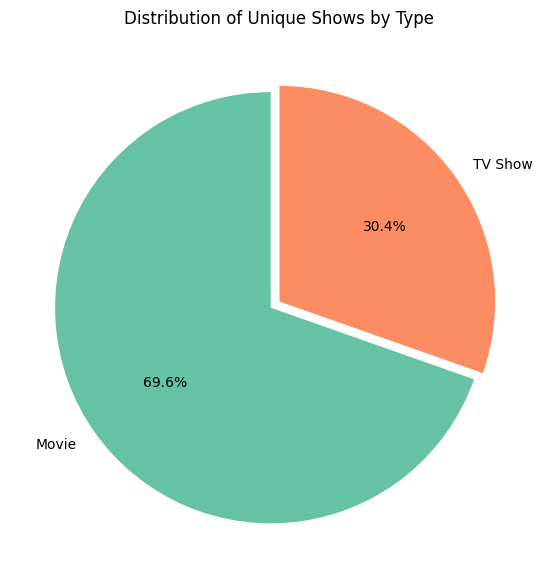

In [ ]:
# Distribution of content across the different types using pie chart
plt.figure(figsize=(7, 7))
df.groupby('type')['show_id'].nunique().plot.pie(autopct ='%1.1f%%', startangle = 90, explode = (0.05, 0), ylabel='', colors=plt.get_cmap('Set2').colors)
plt.title('Distribution of Unique Shows by Type')
plt.show()

### **Distribution of Content by Type (Movie vs. TV Show)**

### Insights:
- **Movies** account for the majority of the content, with **6,125 unique titles**, which is approximately **69.6%** of the total content.
- **TV Shows** make up the remaining **2,674 unique titles**, which is about **30.4%**.
- This indicates that Netflix (or the dataset source) has historically focused more on producing or acquiring **movies** than **TV shows**.
- The platform offers more variety and volume in **movie content**, potentially due to their shorter production cycles and broader genre flexibility.


### **2) Who are the top 10 most featured directors?**


In [ ]:
Top_10_Directors = df.drop_duplicates(subset=['director', 'title'])['director'].value_counts().reset_index(name='Total Movies & Shows').rename(columns={'index': 'director'})
Top_10_Directors = Top_10_Directors[Top_10_Directors['director'] != 'Unknown_director'].sort_values(by='Total Movies & Shows', ascending=False).head(10)
print(f'Top 10 Unique Directors:\n\n {Top_10_Directors}')

Top 10 Unique Directors:

                director  Total Movies & Shows
1         Rajiv Chilaka                    22
2             Jan Suter                    18
3           Raúl Campos                    18
4           Suhas Kadav                    16
5          Marcus Raboy                    16
6             Jay Karas                    15
7   Cathy Garcia-Molina                    13
10      Youssef Chahine                    12
8       Martin Scorsese                    12
9           Jay Chapman                    12


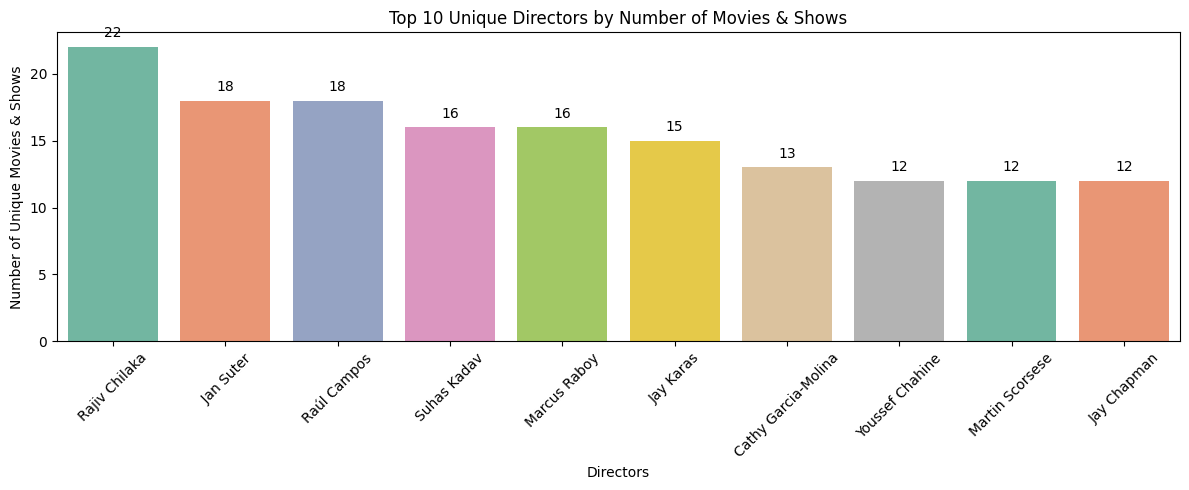

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top_10_Directors, x='director', y='Total Movies & Shows', hue = 'director', palette='Set2')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Directors')
plt.ylabel('Number of Unique Movies & Shows')
plt.title('Top 10 Unique Directors by Number of Movies & Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top 10 Directors by Number of Unique Movies & Shows**

### Insights:
- **Rajiv Chilaka** leads with **22 unique titles**, showing his strong presence (likely in children's or animated content).
- **Jan Suter** and **Raúl Campos** are tied for second place with **18 titles** each, suggesting frequent collaboration or direction of similar types of content.
- **Suhas Kadav** and **Marcus Raboy** follow closely, both having **16 titles**, indicating their consistent involvement in content production.
- Renowned names like **Martin Scorsese** also appear, highlighting Netflix's inclusion of content from globally recognized directors.
- The diversity in this top 10 list showcases a mix of regional and international creators, reflecting Netflix’s global content strategy.


### **3) Which countries produce the most content on Netflix?**


In [ ]:
df['country'] = df['country'].str.strip()
Top_10_Country = df.drop_duplicates(subset=['country', 'title'])['country'].value_counts().reset_index(name='Total Movies & Shows').rename(columns={'index': 'country'})
Top_10_Country = Top_10_Country[Top_10_Country['country'] != 'Unknown_country'].sort_values(by='Total Movies & Shows', ascending=False).head(10)
print(f'Top 10 Unique Country:\n\n {Top_10_Country}')

Top 10 Unique Country:

            country  Total Movies & Shows
0    United States                  3688
1            India                  1044
3   United Kingdom                   806
4           Canada                   445
5           France                   393
6            Japan                   318
7      South Korea                   237
8            Spain                   232
9          Germany                   226
10          Mexico                   169


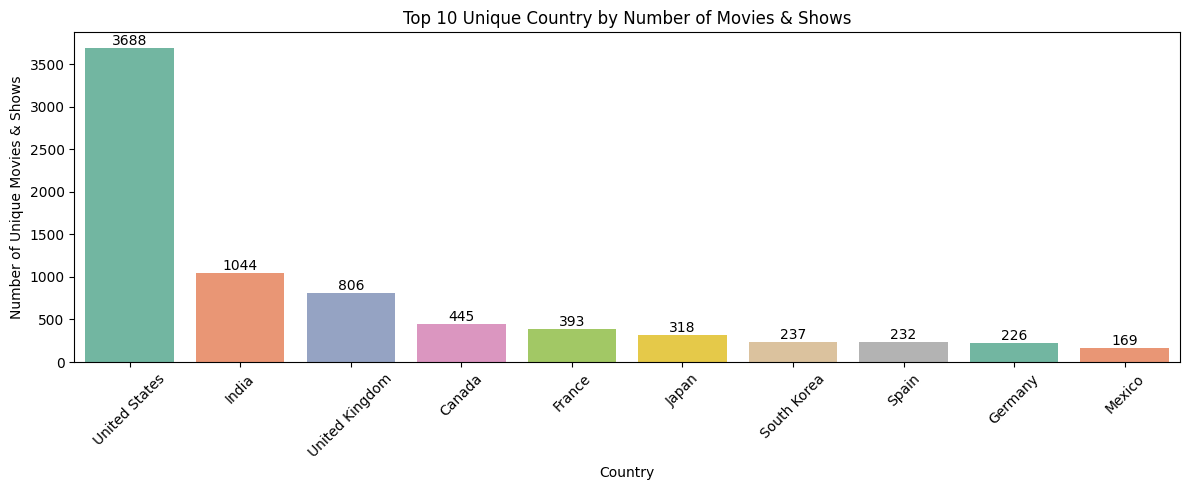

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top_10_Country, x='country', y='Total Movies & Shows', hue = 'country', palette='Set2')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Country')
plt.ylabel('Number of Unique Movies & Shows')
plt.title('Top 10 Unique Country by Number of Movies & Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top 10 Countries by Number of Unique Movies & Shows on Netflix**

### Insights:
- **United States** dominates Netflix's library with **3688** unique titles, showcasing its position as the leading content provider.
- **India** follows significantly with **1044** titles, reflecting Netflix's focused expansion into the Indian market.
- **United Kingdom** ranks third (**806 titles**), emphasizing its strong film and television industry.
- Countries like **Canada (445)**, **France (393)**, and **Japan (318)** also contribute notably, indicating a diverse and multicultural content portfolio.
- The presence of **South Korea (237)** reflects the global popularity of K-dramas and Korean cinema.
- European nations such as **Spain (232)** and **Germany (226)** show substantial content offerings, likely driven by regional productions and co-productions.
- **Mexico (169)** indicates a strong Latin American presence on the platform.

📌 Overall, Netflix is leveraging content from a wide range of countries to cater to its global audience.


### **4) What are the most common genres (listed_in)?**


In [ ]:
df['listed_in'] = df['listed_in'].str.strip()
Top_10_Listed_in = df.drop_duplicates(subset=['listed_in', 'title'])['listed_in'].value_counts().reset_index(name='Total Movies & Shows').rename(columns={'index': 'listed_in'})
Top_10_Listed_in = Top_10_Listed_in[Top_10_Listed_in['listed_in'] != 'Unknown_listed_in'].sort_values(by='Total Movies & Shows', ascending=False).head(10)
print(f'Top 10 Unique Listed_in:\n\n {Top_10_Listed_in}')

Top 10 Unique Listed_in:

                   listed_in  Total Movies & Shows
0      International Movies                  2750
1                    Dramas                  2421
2                  Comedies                  1672
3    International TV Shows                  1349
4             Documentaries                   869
5        Action & Adventure                   859
6                 TV Dramas                   761
7        Independent Movies                   754
8  Children & Family Movies                   641
9           Romantic Movies                   616


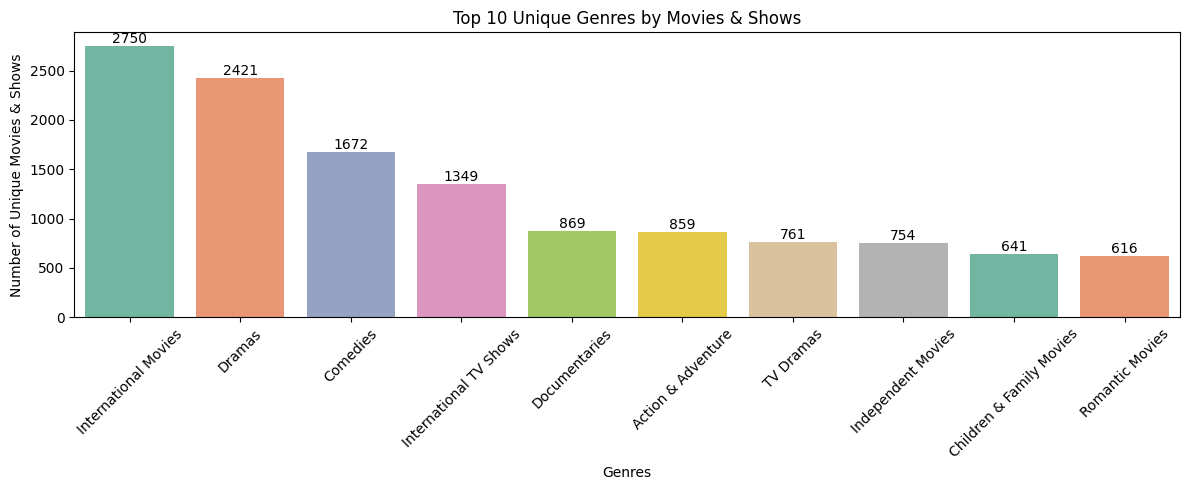

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top_10_Listed_in, x='listed_in', y='Total Movies & Shows', hue = 'listed_in', palette='Set2')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Genres')
plt.ylabel('Number of Unique Movies & Shows')
plt.title('Top 10 Unique Genres by Movies & Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top 10 Most Common Genres or Categories on Netflix (`listed_in`)**

### Insights:
- **International Movies** lead with **2750** unique titles, highlighting Netflix's global content strategy.
- **Dramas (2421)** and **Comedies (1672)** are the most prominent traditional genres, reflecting audience demand for emotional and entertaining narratives.
- **International TV Shows (1349)** further confirm Netflix's expansion into regional and multilingual content.
- **Documentaries (869)** show that there is a strong interest in factual and educational storytelling.
- **Action & Adventure (859)** appeals to viewers seeking thrill and high-paced entertainment.
- **TV Dramas (761)** indicate a solid collection of serialized storytelling across various cultures.
- **Independent Movies (754)** point to Netflix's support for indie filmmakers and non-mainstream cinema.
- **Children & Family Movies (641)** reflect Netflix’s effort to provide family-friendly content.
- **Romantic Movies (616)** maintain their popularity, catering to audiences seeking emotional and love-centered stories.

📌 Overall, the data showcases Netflix's diverse genre distribution, ensuring there’s something for every kind of viewer.


### **5) What are the most popular durations for Movies?**


In [ ]:
Movies_df = df[df['type'] == 'Movie']
Top_10_Duration_Movies = Movies_df['duration'].value_counts().reset_index().head(10)
Top_10_Duration_Movies.columns = ['duration', 'Number of Movies']
print(f'Top 10 Unique Duration Movies:\n\n {Top_10_Duration_Movies}')

Top 10 Unique Duration Movies:

   duration  Number of Movies
0   94 min              4337
1  106 min              3992
2   97 min              3624
3   95 min              3560
4   96 min              3511
5   93 min              3480
6   90 min              3305
7  105 min              3209
8  107 min              3103
9  101 min              3048


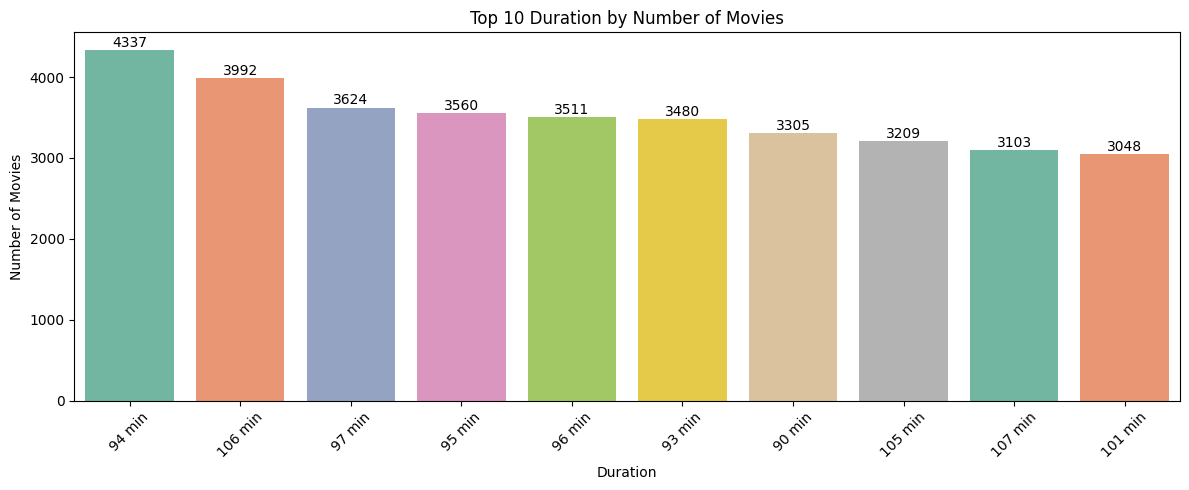

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top_10_Duration_Movies, x='duration', y='Number of Movies', hue = 'duration', palette='Set2')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.title('Top 10 Duration by Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top 10 Most Common Movie Durations on Netflix:**

### Insights:
1. **Most movies on Netflix have a duration between 90 and 107 minutes**, indicating that Netflix favors **standard full-length feature films** (typically 1.5 to 1.75 hours).
2. The **most frequent duration is 94 minutes** with **4337 movies**, showing a strong clustering around this time length.
3. Other popular durations include:
   - **106 min (3992 movies)**
   - **97 min (3624 movies)**
   - **95 min (3560 movies)**
   - **96 min (3511 movies)**

4. This consistency suggests:
   - Netflix likely prefers content that aligns with **viewer attention spans and standard cinematic formats**.
   - There's a **strategic emphasis on quick yet complete storytelling** to cater to binge-watchers and casual viewers alike.

📌 Overall, Netflix’s catalog for movies tends to stick to a **"sweet spot" runtime** that balances depth of story with viewer engagement.


### **6) What are the most common season counts for TV Shows?**


In [ ]:
Season_df = df[df['type'] == 'TV Show']
Top_10_Duration_TV_Show = Season_df['duration'].value_counts().reset_index().head(10)
Top_10_Duration_TV_Show.columns = ['duration', 'Number of Season']
print(f'Top 10 Unique Duration TV Show:\n\n {Top_10_Duration_TV_Show}')

Top 10 Unique Duration TV Show:

     duration  Number of Season
0   1 Season             34995
1   2 Season              9559
2   3 Season              5084
3   4 Season              2134
4   5 Season              1698
5   7 Season               843
6   6 Season               633
7   8 Season               286
8   9 Season               257
9  10 Season               220


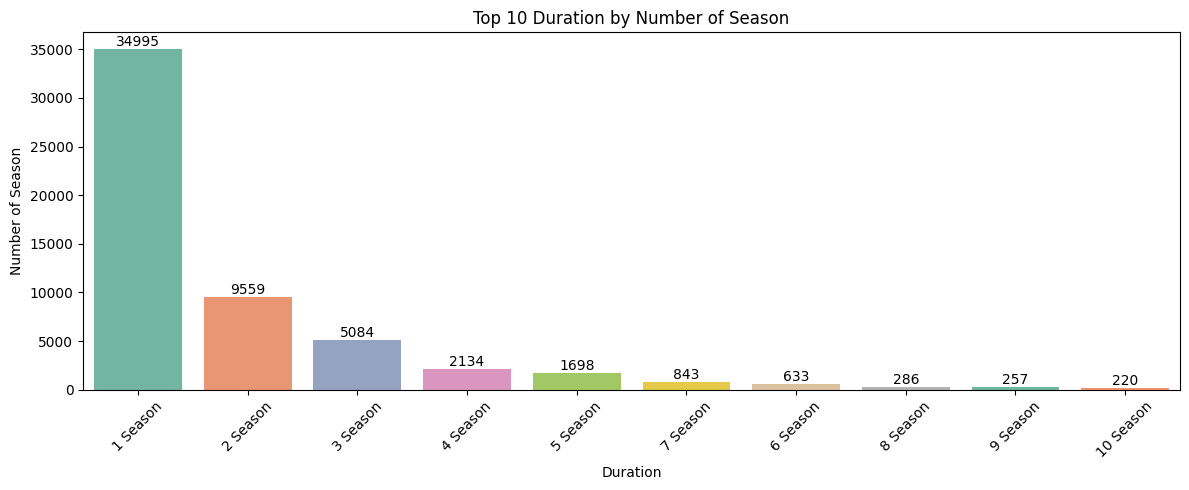

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top_10_Duration_TV_Show, x='duration', y='Number of Season', hue = 'duration', palette='Set2')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Duration')
plt.ylabel('Number of Season')
plt.title('Top 10 Duration by Number of Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Top 10 Most Common TV Show Durations on Netflix**

### Insights:

1. **Majority of TV Shows on Netflix are limited to just 1 season**:
   - **1 Season alone accounts for 34,995 shows**, which is an overwhelming majority.
   - This clearly shows that Netflix heavily focuses on **mini-series, limited series, or short-term content**.

2. As the number of seasons increases, the number of shows **drops drastically**:
   - **2 Seasons**: 9,559 shows
   - **3 Seasons**: 5,084 shows
   - **4 Seasons**: 2,134 shows
   - ...and so on

3. This trend suggests:
   - Netflix prioritizes **fresh and fast content turnover** rather than long-running series.
   - There may be a strategic preference for **experimenting with new concepts** and **minimizing production risk** by avoiding long-term commitments.

📌 **Conclusion**: Netflix is a platform dominated by **short TV shows** — great for users looking for **quick content** or **new stories without deep time commitments**.


### **7) Which ratings (like PG, TV-MA, etc.) are most frequently used?**


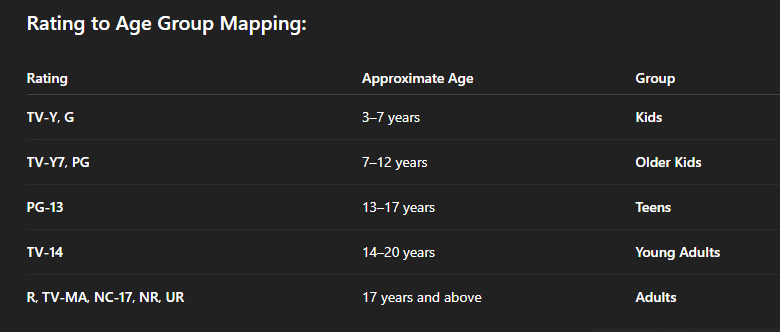

In [ ]:
Rating_Counts = df['rating'].str.strip().value_counts().reset_index()
Rating_Counts.columns = ['Rating', 'Total No. of Movies & Shows']
print("Most Frequently Used Ratings:\n")
print(Rating_Counts)

Most Frequently Used Ratings:

         Rating  Total No. of Movies & Shows
0        Adults                       101514
1  Young Adults                        43869
2    Older Kids                        32235
3         Teens                        16246
4          Kids                         7974


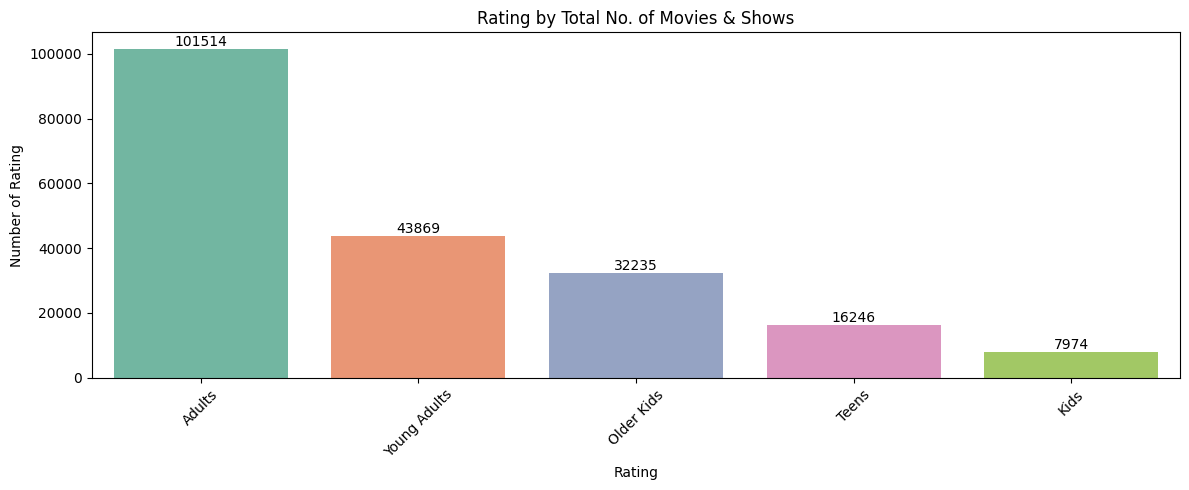

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Rating_Counts, x='Rating', y='Total No. of Movies & Shows', hue='Rating', palette='Set2')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Rating')
plt.ylabel('Number of Rating')
plt.title('Rating by Total No. of Movies & Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Most Frequently Used Content Audience Ratings on Netflix:**

### Insights:

1. **Dominance of Adult Content**:
   - **'Adults' rating appears in 101,514 titles**, which is **more than 50%** of the total content.
   - Indicates Netflix’s strong focus on **mature themes, violence, language, or adult storylines**.

2. **Youth-Oriented Content**:
   - **'Young Adults'**: 43,869 titles — typically aimed at viewers aged 16–25.
   - **'Teens'** and **'Older Kids'** together make up around 48,481 titles.
   - This reflects a **broad offering for middle and high school audiences**, likely including shows like *Stranger Things*, *Wednesday*, etc.

3. **Kids’ Content is the Smallest Segment**:
   - Only **7,974 titles** are classified under the **‘Kids’** category.
   - Suggests that **Netflix is not primarily focused on very young children**, but still offers a decent library for them.

📌 **Conclusion**:  
Netflix’s content library is **heavily skewed toward adult and young adult audiences**, showing their primary target market. There’s significant content for teens and older kids


### **8) Which actors appear most frequently across all titles?**


In [ ]:
df['cast'] = df['cast'].str.strip()
Top_10_Cast = df.drop_duplicates(subset=['cast', 'title'])['cast'].value_counts().reset_index(name='Total Movies & Shows').rename(columns={'index': 'cast'})
Top_10_Cast = Top_10_Cast[Top_10_Cast['cast'] != 'Unknown_cast'].sort_values(by='Total Movies & Shows', ascending=False).head(10)
print(f'Top 10 Unique Actors:\n\n {Top_10_Cast}')

Top 10 Unique Actors:

                 cast  Total Movies & Shows
1        Anupam Kher                    43
2     Shah Rukh Khan                    35
3      Julie Tejwani                    33
4   Naseeruddin Shah                    32
5   Takahiro Sakurai                    32
6       Rupa Bhimani                    31
8            Om Puri                    30
7       Akshay Kumar                    30
9          Yuki Kaji                    29
11  Amitabh Bachchan                    28


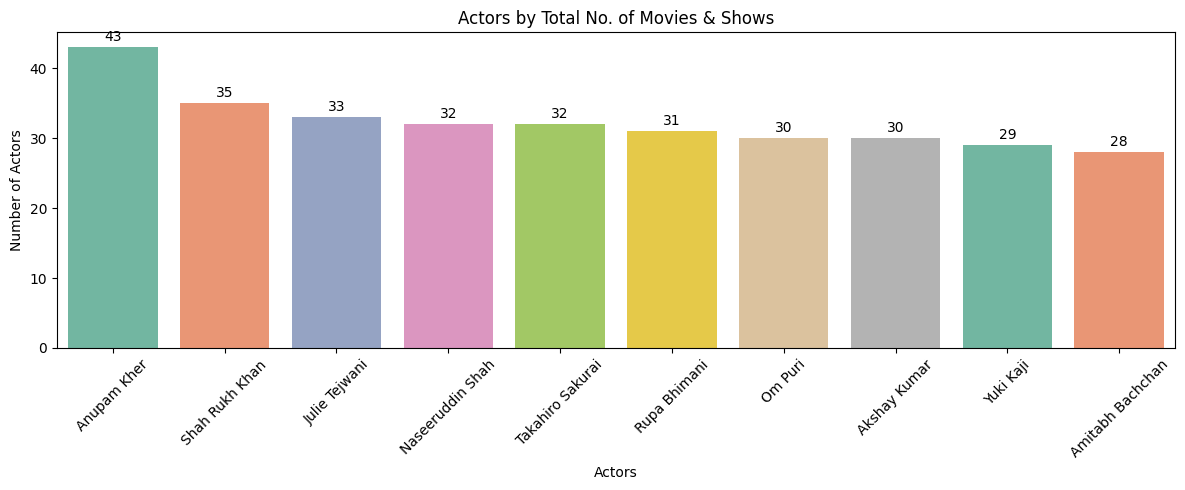

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top_10_Cast, x='cast', y='Total Movies & Shows', hue='cast', palette='Set2')

# Add numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Actors')
plt.ylabel('Number of Actors')
plt.title('Actors by Total No. of Movies & Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Top 10 Most Featured Actors on Netflix**

### Insights:

1. **Dominance of Indian Actors**:
   - **Anupam Kher (43 titles)**, **Shah Rukh Khan (35)**, **Naseeruddin Shah (32)**, **Rupa Bhimani (31)**, **Om Puri (30)**, **Akshay Kumar (30)**, and **Amitabh Bachchan (28)** show that Indian cinema has a **strong representation** on Netflix.
   - This reflects **Netflix's investment in Bollywood and regional Indian content**.

2. **Anime Voice Actors Also Prominent**:
   - **Takahiro Sakurai** and **Yuki Kaji** are well-known **Japanese voice actors**, suggesting a significant presence of **anime content** in the library.

3. **Surprising Entry – Julie Tejwani**:
   - With 33 appearances, Julie Tejwani, a **voice/dubbing artist**, shows how **dubbed content is boosting actor visibility**, particularly for animated or kids’ shows.

📌 **Conclusion**:  
Netflix offers **diverse content featuring globally popular actors**, but the top list is **heavily dominated by Indian film stars**, indicating strong user engagement and viewership in India and among Indian diaspora. The presence of anime voice actors also highlights **Netflix’s growing anime catalog**.


### **9) Are there any directors who have worked across both Movies and TV Shows?**


In [ ]:
Directors_df = df[df['director'] != 'Unknown_director']
Director_Types = Directors_df.groupby('director')['type'].nunique()
Directors_Both = Director_Types[Director_Types == 2].index.tolist()

Directors_Both_df = pd.DataFrame(Directors_Both, columns=['Director'])

print("Directors who have worked on both Movies and TV Shows:\n")
print(Directors_Both_df)

Directors who have worked on both Movies and TV Shows:

                Director
0       Abhishek Chaubey
1          Alban Teurlai
2         Anurag Kashyap
3       Hiroyuki Seshita
4     John Paul Tremblay
..                   ...
61        Tiller Russell
62           Tosin Coker
63     Tsutomu Mizushima
64  Vikramaditya Motwane
65          Ziad Doueiri

[66 rows x 1 columns]


In [ ]:
Directors_Both_df = df[df['director'].isin(Directors_Both)]
Director_Title_Counts = Directors_Both_df['director'].value_counts().reset_index()
Director_Title_Counts.columns = ['Director', 'Total Titles']
Director_Title_Counts = Director_Title_Counts.sort_values(by='Total Titles', ascending=False)
Top_Directors_TV_Show_and_Movies = Director_Title_Counts.head(10)
Top_Directors_TV_Show_and_Movies

,Director,Total Titles
0,Noam Murro,219
1,Brad Anderson,216
2,Oliver Stone,205
3,Thomas Astruc,193
4,Quentin Tarantino,181
5,Eli Roth,155
6,Manolo Caro,142
7,Jalil Lespert,105
8,Obi Emelonye,104
9,Kemi Adetiba,91


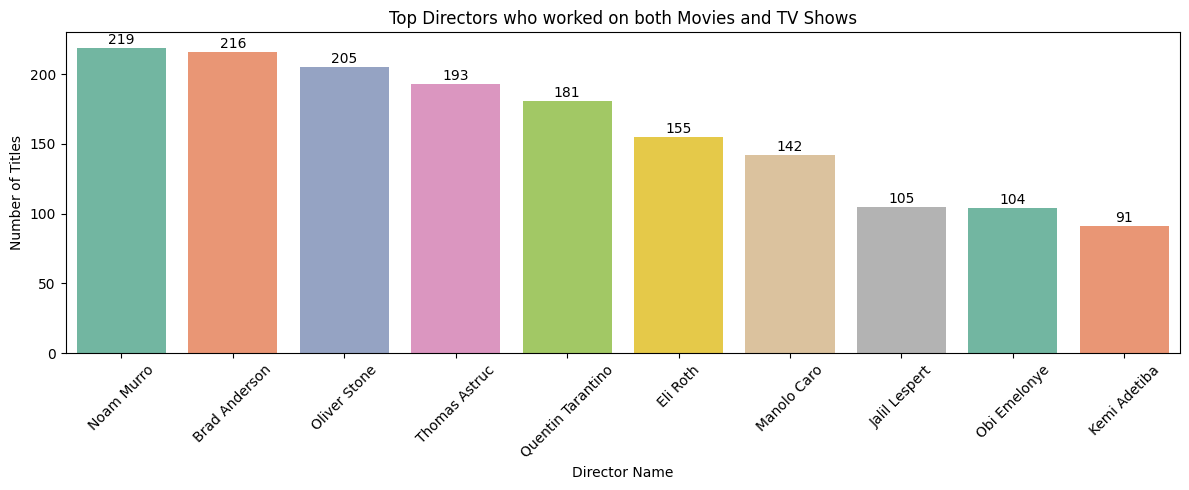

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top_Directors_TV_Show_and_Movies, x='Director', y='Total Titles', hue = 'Director',palette='Set2')

# ✅ Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Director Name')
plt.ylabel('Number of Titles')
plt.title('Top Directors who worked on both Movies and TV Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top Directors with Both Movies & TV Shows on Netflix:**

### **Insights:**

1. **Versatility Highlighted**:
   - These directors have **worked across both formats** — Movies and TV Shows — showing their **creative adaptability**.

2. **Top 3 Most Prolific**:
   - **Noam Murro (219 titles)** and **Brad Anderson (216)** top the list, suggesting **highly syndicated or frequently listed works**.
   - **Oliver Stone (205)** is a globally acclaimed filmmaker, showing Netflix’s effort to include **award-winning versatile content creators**.

3. **Animated/Franchise Contributors**:
   - **Thomas Astruc (193)** is known for “Miraculous Ladybug” – likely multiple short episodes or formats boosting the count.

4. **Strong Presence of Regional Voices**:
   - **Obi Emelonye (104)** and **Kemi Adetiba (91)** reflect **growing Nigerian/Nollywood content**, highlighting Netflix’s **global content expansion strategy**.

5. **Big Names with Cross-Genre Appeal**:
   - **Quentin Tarantino (181)** and **Eli Roth (155)** are known for bold and genre-defining cinema, showing how **Netflix blends mainstream and cult** creators.

📌 **Conclusion**:  
This list shows that Netflix not only hosts content from **globally renowned directors** but also emphasizes those who can **deliver stories in both episodic and film formats**. It underlines the platform’s focus on **content diversity and global reach**.


### **10) What is the longest movie or show available?**


In [ ]:
Movies = df[df['type'] == 'Movie'].copy()
TV_Show = df[df['type'] == 'TV Show'].copy()

Movies['Duration_Minutes'] = Movies['duration'].str.extract('(\d+)').astype(float)
TV_Show['Duration_Seasons'] = TV_Show['duration'].str.extract('(\d+)').astype(int)

Unique_Movies = Movies.drop_duplicates(subset='Duration_Minutes', keep='first')
Unique_TV_Shows = TV_Show.drop_duplicates(subset='Duration_Seasons', keep='first')

Top5_Unique_Movies = Unique_Movies.sort_values(by='Duration_Minutes', ascending=False).head(5)
Top5_Unique_TV_Shows = Unique_TV_Shows.sort_values(by='Duration_Seasons', ascending=False).head(5)
Top5_Unique_Movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Duration_Minutes
99312,4254,Movie,Black Mirror: Bandersnatch,Unknown_director,Fionn Whitehead,United States,2018-12-28,2018,Adults,312 min,Dramas,312.0
18403,718,Movie,Headspace: Unwind Your Mind,Unknown_director,Andy Puddicombe,Unknown_country,2021-06-15,2021,Kids,273 min,Documentaries,273.0
59288,2492,Movie,The School of Mischief,Houssam El-Din Mustafa,Suhair El-Babili,Egypt,2020-05-21,1973,Young Adults,253 min,Comedies,253.0
59234,2488,Movie,No Longer kids,Samir Al Asfory,Said Saleh,Egypt,2020-05-21,1979,Young Adults,237 min,Comedies,237.0
59150,2485,Movie,Lock Your Girls In,Fouad El-Mohandes,Fouad El-Mohandes,Unknown_country,2020-05-21,1982,Older Kids,233 min,Comedies,233.0


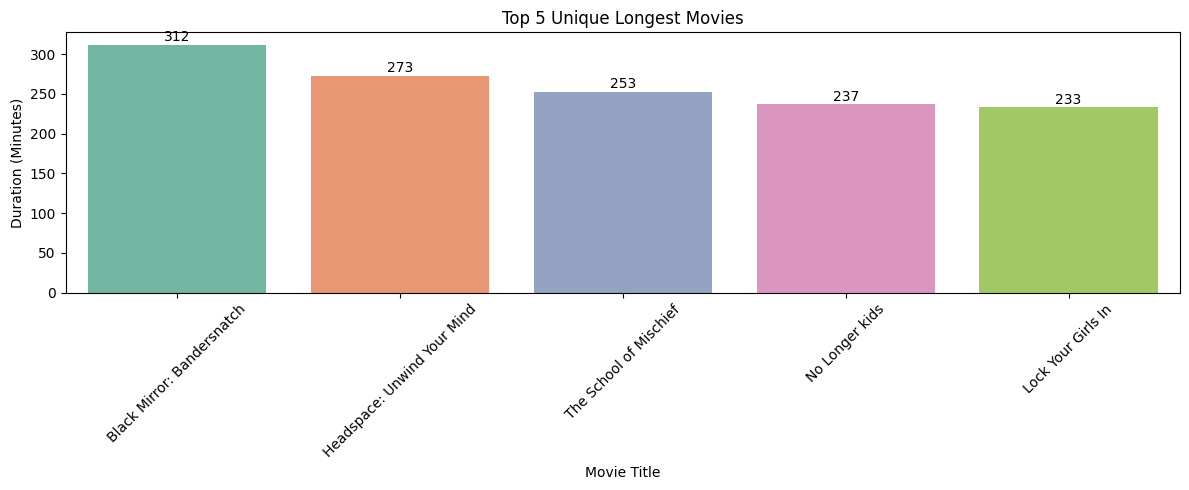

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top5_Unique_Movies, x='title', y='Duration_Minutes', hue = 'title',palette='Set2')

# ✅ Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Movie Title')
plt.ylabel('Duration (Minutes)')
plt.title('Top 5 Unique Longest Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Top 5 Longest Movies:**

### Insights

1. **Longest Movie**:  
   - *Black Mirror: Bandersnatch* leads with a runtime of **312 minutes** (more than 5 hours), showcasing Netflix's experimentation with interactive and extended storytelling formats.

2. **Documentaries with Long Durations**:  
   - *Headspace: Unwind Your Mind*, a documentary, is notably long at **273 minutes**, indicating Netflix’s commitment to deep, immersive non-fiction content.

3. **Classic & Older Movies**:  
   - The presence of older titles like *The School of Mischief* (1973), *No Longer Kids* (1979), and *Lock Your Girls In* (1982) indicates Netflix’s effort to preserve and stream vintage content with long runtimes.

4. **Genre Focus on Comedies**:  
   - Among the longest movies, **comedies appear prominently** (3 out of 5), suggesting that longer format comedies have a niche but important place in Netflix’s catalog.

5. **Geographical Diversity**:  
   - Movies come from diverse countries including the **United States, Egypt, and unknown origin**, reflecting Netflix’s global content acquisition strategy.

---

### 📌 Conclusion:  
Netflix's longest movies vary from interactive modern hits to vintage comedies and documentaries, reflecting a broad strategy to cater to diverse audience preferences with long-format content. This range helps Netflix engage both niche viewers and fans of classic cinema.


In [ ]:
Top5_Unique_TV_Shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Duration_Seasons
13570,549,TV Show,Grey's Anatomy,Unknown_director,Ellen Pompeo,United States,2021-07-03,2020,Young Adults,17 Season,Romantic TV Shows,17
57682,2424,TV Show,Supernatural,Phil Sgriccia,Jared Padalecki,United States,2020-06-05,2019,Young Adults,15 Season,Classic & Cult TV,15
33141,1355,TV Show,Heartland,Unknown_director,Amber Marshall,Canada,2021-02-01,2019,Young Adults,13 Season,TV Dramas,13
114786,4965,TV Show,Trailer Park Boys,Unknown_director,Mike Smith,Canada,2018-03-30,2018,Adults,12 Season,Classic & Cult TV,12
145501,6457,TV Show,Cheers,Unknown_director,Ted Danson,United States,2017-07-01,1992,Older Kids,11 Season,Classic & Cult TV,11


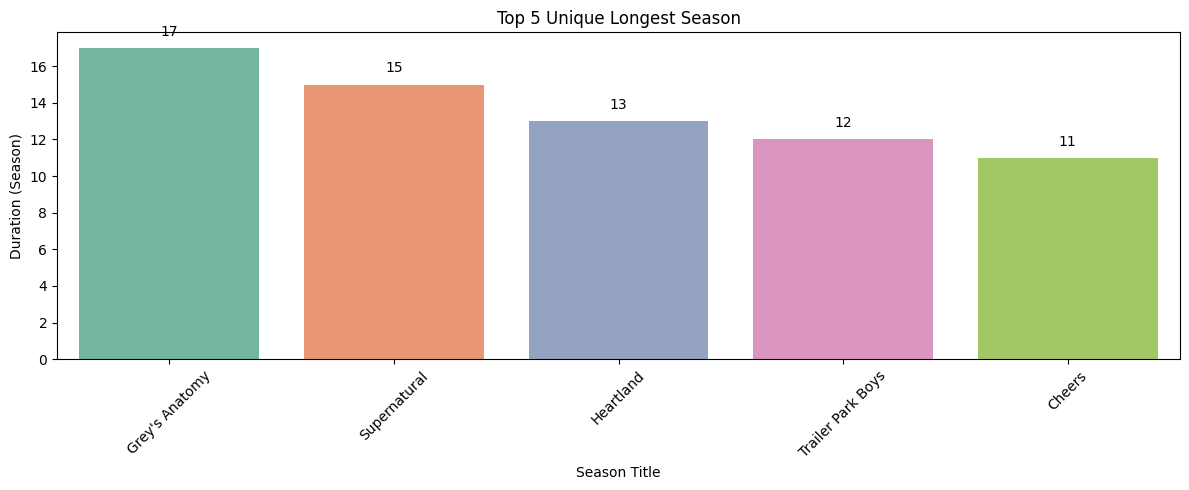

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Top5_Unique_TV_Shows, x='title', y='Duration_Seasons', hue = 'title',palette='Set2')

# ✅ Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha='center', va='bottom', fontsize=10)

plt.xlabel('Season Title')
plt.ylabel('Duration (Season)')
plt.title('Top 5 Unique Longest Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **🎬 Top 5 Longest-Running TV Shows on Netflix (by Unique Season Count)**

### Insights:

1. **Longest Show**:
   - **Grey’s Anatomy** leads with **17 seasons**, showcasing its longevity and consistent audience demand.

2. **Classic & Cult Hits**:
   - 3 out of 5 shows fall under the **"Classic & Cult TV"** category, indicating viewer preference for **nostalgic or iconic content**.

3. **Regional Trend**:
   - **Canada** appears **twice**, showing its **strong TV production presence** on Netflix (Heartland, Trailer Park Boys).

4. **Rating Categories**:
   - Most shows are rated for **Young Adults**, reinforcing that long-format series target **mature but non-explicit audiences**.

5. **Versatile Genres**:
   - The mix of **romance, drama, and cult** genres highlights Netflix’s **varied long-form content portfolio**.

---

📌 **Conclusion**:  
These shows demonstrate that **season count** correlates with **viewer loyalty and engagement**. Netflix maintains a catalog of **long-format classics and ongoing series**, catering to binge-watchers and long-term fans alike.


# **⏳ Time-Based Questions**

### **11) How has Netflix content grown over the years?**


In [ ]:
Content_Growth = df.groupby(['year_added', 'type'])['show_id'].count().unstack().fillna(0).sort_values(by='year_added', ascending=False)
print(f"Netflix Content Growth by Year and Type:\n\n{Content_Growth}")

Netflix Content Growth by Year and Type:

type          Movie  TV Show
year_added                  
2021        25709.0  10825.0
2020        32487.0  13563.0
2019        34377.0  12508.0
2018        27960.0   7736.0
2017        18252.0   6957.0
2016         4858.0   3716.0
2015         1125.0    475.0
2014          345.0    107.0
2013           75.0    159.0
2012           36.0     24.0
2011          438.0      0.0
2010           20.0      1.0
2009           30.0      0.0
2008           18.0     37.0


In [ ]:
Content_Growth.plot(kind='bar', figsize=(12, 5), colormap='Set2')

plt.title('Netflix Content Growth by Year and Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## **📌 Netflix Content Growth by Year and Type:**

### Insights

1. **Rapid Growth in Recent Years**:  
   - From 2017 to 2021, there is a **massive surge in both Movies and TV Shows**, with 2020 and 2019 seeing the highest numbers of titles added.  
   - For example, in 2019, Netflix added over **34,000 Movies** and **12,500 TV Shows**, reflecting aggressive content expansion.

2. **Movies Lead Content Additions**:  
   - Movies consistently outnumber TV Shows every year, often by a large margin. This shows Netflix’s strong focus on expanding its movie catalog.

3. **TV Shows Increasing Steadily**:  
   - While fewer in number, TV Shows have shown steady growth, especially from 2016 onward, indicating a growing investment in series content to engage binge-watchers.

4. **Early Years Had Minimal Additions**:  
   - Before 2014, the content additions were quite low, with fewer than a few hundred titles added each year. This suggests Netflix’s content library was much smaller in its early streaming phase.

5. **Content Expansion Strategy**:  
   - The data highlights Netflix’s strategy to rapidly increase content offerings over the last decade to capture diverse audience interests across movies and TV shows.

---

### 📌 Conclusion:  
Netflix’s explosive growth in content from 2017 onwards, with a strong emphasis on movies complemented by increasing TV show offerings, underpins its global leadership in streaming by consistently broadening and refreshing its content library.


### **12) How many titles were added per year or month?**


In [ ]:
Titles_per_Year = df.groupby('year_added')['title'].count().sort_index()

df_titles_year = Titles_per_Year.reset_index()
df_titles_year.columns = ['Year_Added', 'Number_of_Titles']

print(f"Title Count per Year:\n{Titles_per_Year}")

Title Count per Year:
year_added
2008       55
2009       30
2010       21
2011      438
2012       60
2013      234
2014      452
2015     1600
2016     8574
2017    25209
2018    35696
2019    46885
2020    46050
2021    36534
Name: title, dtype: int64


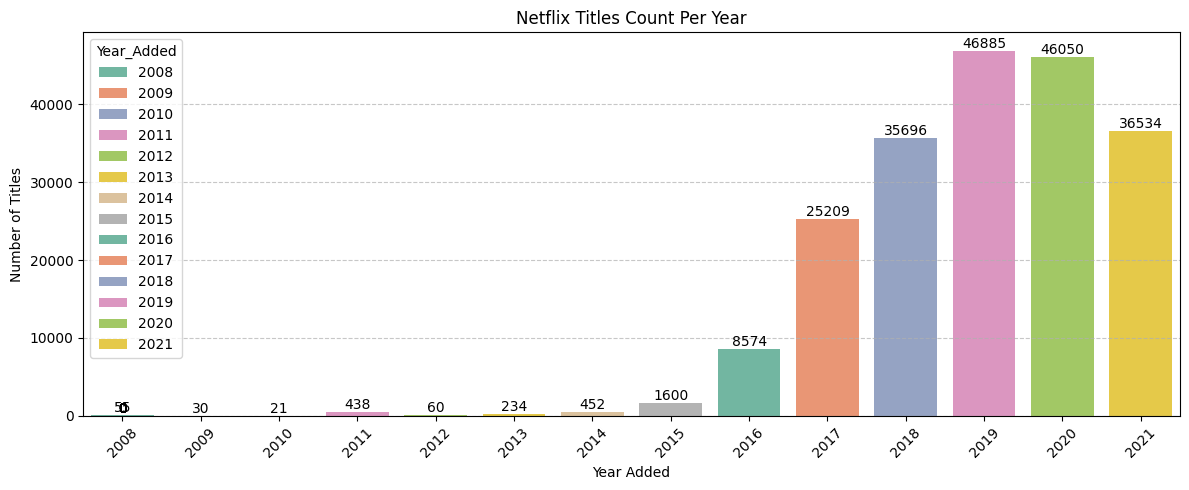

In [ ]:
plt.figure(figsize=(12, 5))

# Use seaborn barplot with Set2 palette directly
ax = sns.barplot(data=df_titles_year, x='Year_Added', y='Number_of_Titles', hue='Year_Added', palette='Set2')

plt.title('Netflix Titles Count Per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## **📌 Netflix Title Count per Year:**

### Insights

1. **Slow Start in Early Years**:  
   - Between 2008 and 2013, Netflix added relatively few titles annually, with counts mostly under 500 per year.

2. **Significant Growth from 2015 Onwards**:  
   - Starting in 2015, there is a sharp rise in new titles added, jumping from **1,600** in 2015 to over **8,500** in 2016.

3. **Peak Content Addition Years**:  
   - The years 2017 to 2019 mark the peak of content additions, with the highest count of **46,885 titles in 2019**. This reflects Netflix's aggressive expansion phase.

4. **Slight Decline After 2019**:  
   - Although still very high, the number of new titles added drops somewhat after 2019, with **46,050 titles in 2020** and **36,534 titles in 2021**. This could indicate a strategic shift or market saturation.

5. **Overall Trend**:  
   - The overall upward trend clearly shows Netflix’s focus on rapidly growing its library to attract and retain subscribers, especially between 2015 and 2019.

---

### 📌 Conclusion:  
Netflix’s title additions accelerated massively starting mid-2010s, peaking around 2019, underscoring its content-driven growth strategy during the global streaming boom.


In [ ]:
Month_Order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Titles per Month with correct month order
Titles_per_Month = df.groupby('month_added')['title'].count().reindex(Month_Order).dropna()

print(f"Title Count per Month:\n{Titles_per_Month}")

# Convert Series to DataFrame for plotting
df_Titles_Month = Titles_per_Month.reset_index()
df_Titles_Month.columns = ['Month_Added', 'Number_of_Titles']

Title Count per Month:
month_added
January      18295
February     13054
March        15772
April        17081
May          13827
June         16659
July         20302
August       17086
September    18120
October      17664
November     15621
December     18357
Name: title, dtype: int64


In [ ]:
plt.figure(figsize=(12, 5))

# Plot with seaborn using Set2 palette
ax = sns.barplot(data=df_Titles_Month, x='Month_Added', y='Number_of_Titles', hue='Month_Added', palette='Set2')

plt.title('Netflix Titles Count Per Month')
plt.xlabel('Month Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), ha='center', va='bottom')

plt.tight_layout()

## **📌 Netflix Title Count per Month:**

### Insights

1. **Highest Content Additions in July and December**:  
   - July tops the list with **20,302 titles**, followed closely by December with **18,357 titles**, indicating strategic content releases in mid-summer and holiday seasons.

2. **Strong Early Year Activity**:  
   - January also shows high activity with **18,295 titles**, suggesting Netflix kicks off the year with many new releases.

3. **Mid-Year and Fall Months Show Consistent Content Growth**:  
   - Months like April, June, August, September, and October all have solid counts ranging between **16,000 and 18,000 titles**, reflecting steady additions throughout the year.

4. **February and May See Slight Dips**:  
   - February has the lowest count of **13,054 titles**, and May is also relatively low with **13,827 titles**, which may be due to seasonal programming or scheduling.

5. **Overall Monthly Trend**:  
   - Netflix consistently adds a large number of titles throughout the year, but there are clear peaks in summer and holiday months, likely to capture higher viewer engagement during vacations and festive periods.

---

### 📌 Conclusion:  
Netflix’s content addition strategy appears to focus on maximizing viewer interest during peak leisure periods (summer and holidays), while maintaining steady growth across other months to keep the catalog fresh year-round.


### **14) What’s the trend of Movies vs. TV Shows over time?**


In [ ]:
Trend_Year_Added = df.groupby(['year_added', 'type']).size().unstack()
Trend_Year_Added.sum(axis=1).sort_values(ascending=False).head(10)

,0
year_added,
2019,46885.0
2020,46050.0
2021,36534.0
2018,35696.0
2017,25209.0
2016,8574.0
2015,1600.0
2014,452.0
2011,438.0


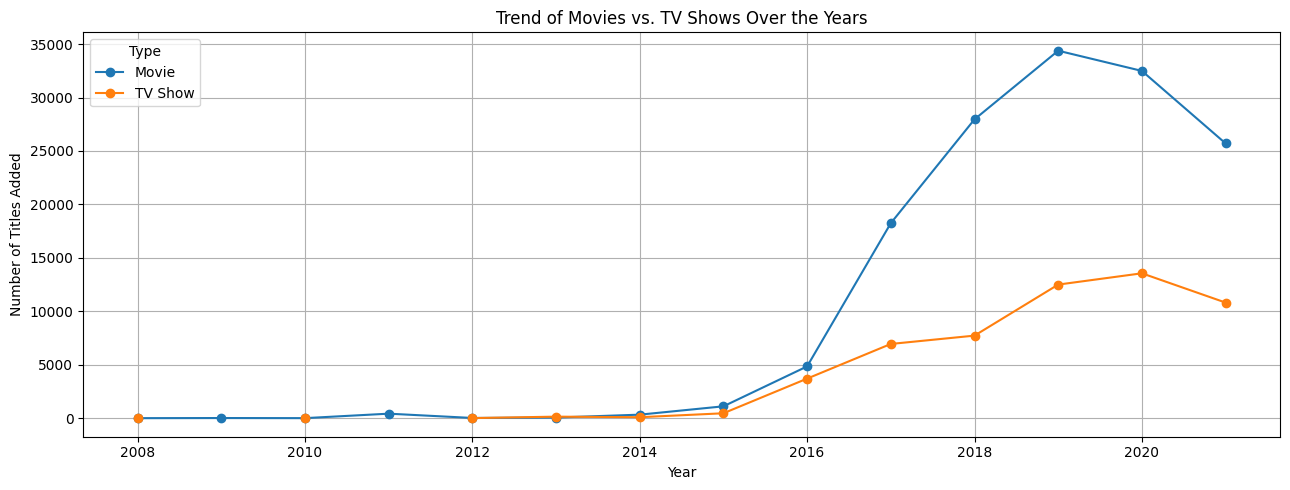

In [ ]:
Trend_Year_Added.plot(kind='line', marker='o', figsize=(13, 5))
plt.title('Trend of Movies vs. TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## **📌 Top Years for Netflix Title Additions:**

### Insights

1. **Peak Content Addition in 2019**:  
   - The year 2019 saw the highest number of titles added with **46,885 titles**, marking it as Netflix's most prolific content expansion year.

2. **Sustained High Additions in 2020 and 2021**:  
   - Despite the pandemic, 2020 remained strong with **46,050 titles**, and 2021 added a substantial **36,534 titles**, showing Netflix's commitment to growing its library even during global disruptions.

3. **Significant Growth from 2016 Onwards**:  
   - Starting in 2016, there was a major jump from previous years, indicating Netflix’s strategic shift toward aggressive content acquisition and production.

4. **Early Years with Low Content Additions**:  
   - Before 2014, title additions were minimal, reflecting Netflix’s early streaming phase and limited original content output.

5. **Overall Growth Trend**:  
   - The data shows a rapid and sustained increase in content additions peaking around 2019–2020, followed by a slight decline in 2021, possibly reflecting a maturation of the platform’s catalog.

---

### 📌 Conclusion:  
Netflix’s aggressive expansion phase started around 2016, culminating in record additions by 2019. The platform continues to maintain a large volume of new content yearly, adapting to market demands and external factors.


### **15) Which week number has the highest number of releases (week_added)?**


In [ ]:
Trend_Week_Added = df.groupby(['week_added', 'type']).size().unstack()
Trend_Week_Added.sum(axis=1).sort_values(ascending=False).head(10)

,0
week_added,
1,9510
35,6993
44,6944
26,6593
40,6267
31,6034
9,5921
27,5785
48,5274


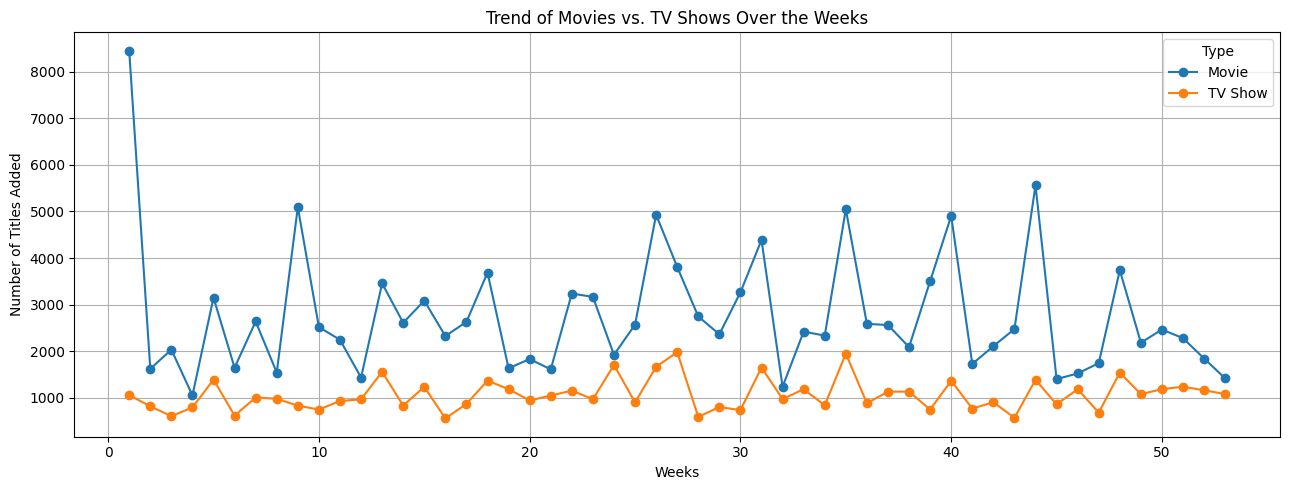

In [ ]:
Trend_Week_Added.plot(kind='line', marker='o', figsize=(13, 5))
plt.title('Trend of Movies vs. TV Shows Over the Weeks')
plt.xlabel('Weeks')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## **📌Top Weeks for Netflix Title Additions**

### Insights

1. **Week 1 Leads in Title Additions**:  
   - The first week of the year stands out with **9,510 titles added**, suggesting a strong start annually with fresh content releases.

2. **High Content Addition in Weeks 35 and 44**:  
   - Weeks 35 (**6,993 titles**) and 44 (**6,944 titles**) also show significant spikes, possibly aligning with late summer and early holiday season content boosts.

3. **Other Notable Weeks**:  
   - Weeks 26 (mid-year), 40, 31, and 9 follow closely, each with over 5,900 titles added, indicating multiple peaks throughout the year for content launches.

4. **Seasonal Content Strategy**:  
   - The distribution suggests Netflix strategically adds content at different times across the year, likely to cater to viewer habits during holidays, summer breaks, and year-end periods.

---

### 📌 Conclusion:  
Netflix’s weekly content addition pattern reveals multiple spikes, with the biggest surge during the first week, supporting early-year marketing pushes, complemented by additional boosts in late summer and fall weeks to maintain viewer engagement year-round.


### **16) In which year were most titles originally released (release_year)?**


In [ ]:
Release_Year = df['release_year'].value_counts().sort_values(ascending=False)
Release_Year.reset_index().head(10)

,release_year,count
0,2018,24316
1,2019,21883
2,2017,20510
3,2020,19697
4,2016,18465
5,2015,14128
6,2021,11894
7,2014,9050
8,2013,7745
9,2012,6354


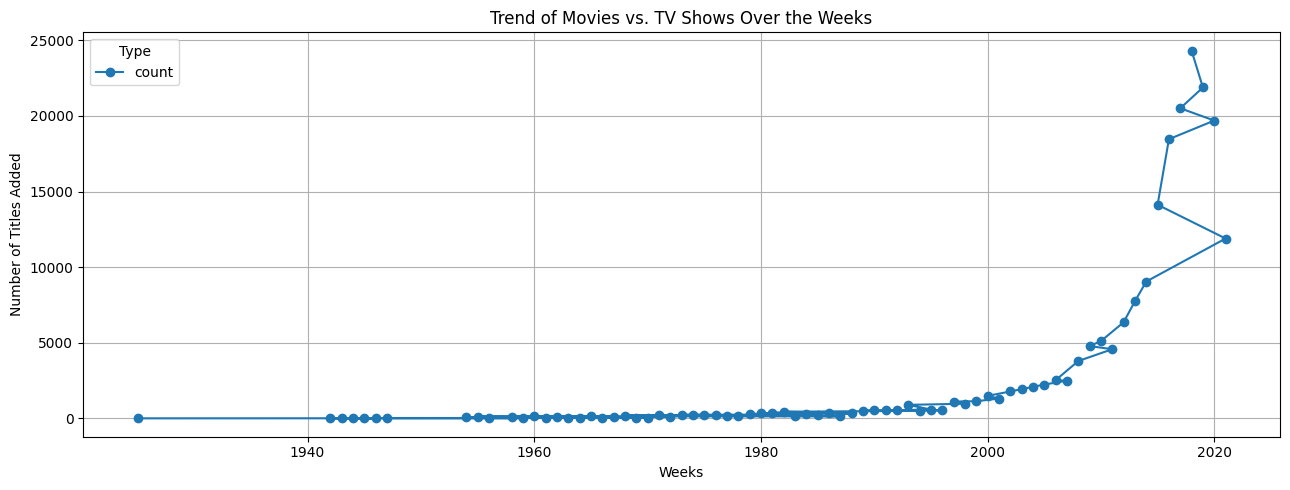

In [ ]:
Release_Year.plot(kind='line', marker='o', figsize=(13, 5))
plt.title('Trend of Movies vs. TV Shows Over the Weeks')
plt.xlabel('Weeks')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## **📌 Most Common Release Years of Titles on Netflix:**

### Insights

1. **Peak Release Year - 2018**:  
   - The highest number of titles were released in **2018**, with **24,316 titles**, indicating a major content push during that year.

2. **Strong Content in 2019 and 2017**:  
   - Close behind, **2019** and **2017** had **21,883** and **20,510** titles released respectively, showing continued high content production.

3. **Recent Trends**:  
   - The years **2020** and **2021** also have significant title counts, reflecting Netflix’s sustained content growth despite global challenges.

4. **Older Releases**:  
   - Titles from earlier years like 2014 and before gradually decrease, as expected, reflecting content aging or fewer additions from those periods.

---

### 📌 Conclusion:  
Netflix’s library is heavily skewed towards recent years, especially from 2017 to 2019, reflecting aggressive content acquisition and production to attract and retain subscribers with fresh releases.


### **17) Which year has the highest number of back-catalog content added (older release year but recent date_added)**?

In [ ]:
Back_Catalog = df[df['release_year'] < df['year_added']]
Back_Catalog['year_added'].value_counts().sort_values(ascending=False).head(1)

,count
year_added,
2019,33375


## **📌 Back-Catalog Content Addition Year:**

### Insight

- **2019** stands out as the year when Netflix added the highest number of **back-catalog titles** — that is, titles released in earlier years but added to Netflix recently.
- In **2019**, a total of **33,375** older titles (with `release_year` earlier than `year_added`) were added to the platform.


How has the number of movies/TV shows added on Netflix per months changed over the time?

In [ ]:
Total_Year_Month_TV_Show_and_Movies = df.groupby(['year_added', 'month_added', 'type'])['show_id'].count().reset_index()
Total_Year_Month_TV_Show_and_Movies.rename(columns={'show_id': 'Total Movies/TV Shows'}, inplace=True)
Total_Year_Month_TV_Show_and_Movies.sample(5)

,year_added,month_added,type,Total Movies/TV Shows
192,2021,March,TV Show,656
12,2012,February,Movie,2
141,2019,July,Movie,2268
181,2021,August,Movie,3164
57,2015,September,Movie,86


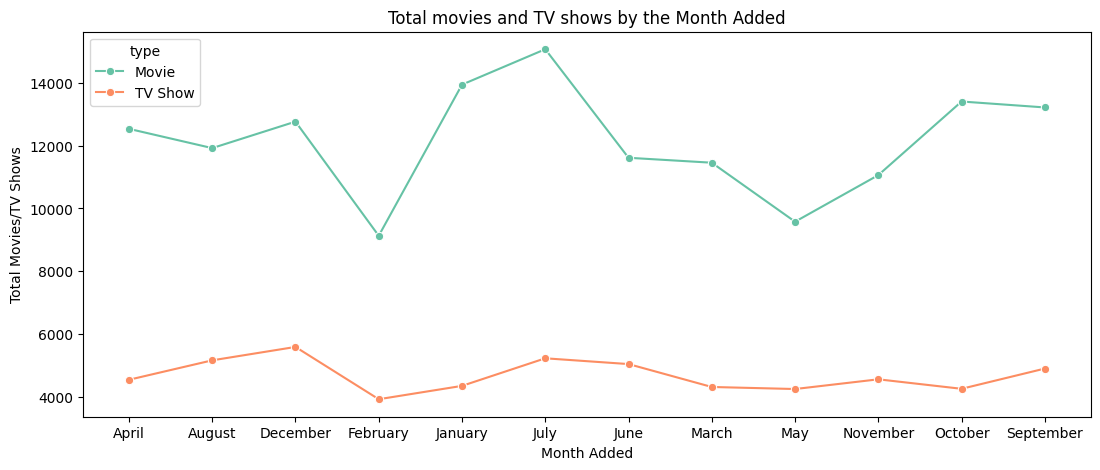

In [ ]:
Total_Year_Month_TV_Show_and_Movies = df.groupby(['month_added', 'type'])['show_id'].count().reset_index()
Total_Year_Month_TV_Show_and_Movies.rename(columns={'show_id': 'Total Movies/TV Shows'}, inplace=True)

plt.figure(figsize = (13,5))
sns.lineplot(data = Total_Year_Month_TV_Show_and_Movies, x = 'month_added', y = 'Total Movies/TV Shows', hue = 'type', marker = 'o', palette = 'Set2')
plt.xlabel('Month Added')
plt.ylabel('Total Movies/TV Shows')
plt.title('Total movies and TV shows by the Month Added')
plt.show()

### 📊 Monthly Content Addition by Year and Type

This table summarizes how many **Movies** and **TV Shows** were added each month, broken down by **year and type**:

#### 🔍 Sample Highlights:
- In **March 2021**, Netflix added **656 TV Shows**.
- In **February 2012**, only **2 Movies** were added — indicating a relatively inactive period for content expansion.
- In **July 2019**, Netflix added a significant number of **Movies (2268)**.
- Similarly, **August 2021** saw the addition of **3164 Movies**, showcasing a high acquisition or release month.
- **September 2015** had a modest contribution with **86 Movies**.

---

### 📌 Insight:

- This year-month-type breakdown helps identify **seasonal spikes** in content acquisition or licensing.
- Large numbers in later years (like 2019–2021) reflect Netflix's **aggressive content expansion** strategy.
- The steady rise in monthly additions over time also indicates a **growing content library**, catering to an expanding global audience.


# **🌍 Geographic-Based Questions**


### **18) Which countries produce the most Movies or TV Shows?**


In [ ]:
Unknown_country = df[df['country'] != 'Unknown_country']
Most_country = (Unknown_country.groupby(['country', 'type'])['show_id'].count().reset_index(name='Total_Titles'))
Most_country = Most_country.sort_values(by='Total_Titles', ascending=False).head(10)
Most_country

,country,type,Total_Titles
279,United States,Movie,38315
198,India,Movie,20713
280,United States,TV Show,11552
143,United States,Movie,7473
277,United Kingdom,Movie,5655
211,Japan,TV Show,4673
278,United Kingdom,TV Show,4078
259,South Korea,TV Show,3656
44,France,Movie,3592
185,France,Movie,3015


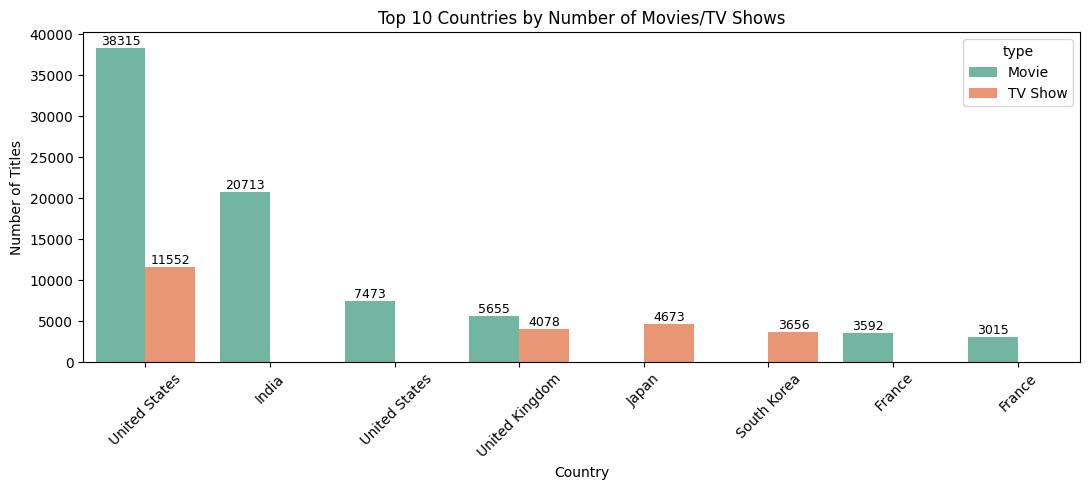

In [ ]:
plt.figure(figsize=(11, 5))
ax = sns.barplot(data=Most_country, x='country', y='Total_Titles', hue='type', palette='Set2')

# Show value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,
                height + 1,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

plt.title('Top 10 Countries by Number of Movies/TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **📊 Key Insights from Top 10 Countries by Netflix Titles:**
 - 🎬 The United States (Movies) dominates with 38,315 titles, showing Netflix’s core content is heavily U.S.-produced films.

 - 🇮🇳 India (Movies) is Netflix’s second-largest contributor with 20,713 titles, reflecting the vast production of Indian cinema on the platform.

 - 📺 The U.S. also leads in TV Shows with 11,552 titles, making it the global hub for both movies and series.

 - 🧐 The presence of two U.S. movie entries (38,315 and 7,473) may point to duplicate or reclassified data needing cleaning.

 - 🇬🇧 The United Kingdom ranks strongly with over 9,700 titles combined across movies and TV shows — indicating a balanced content mix.

 - 🇯🇵 Japan (TV Shows) with 4,673 titles shows the growing global appeal of anime and Japanese drama.

 - 🇰🇷 South Korea contributes 3,656 TV Shows, driven by the rising popularity of K-Dramas worldwide.

 - 🇫🇷 France (Movies) appears twice, possibly due to content in multiple dialects or platforms counting co-productions separately.



### **19) Which countries dominate specific genres like 'International Movies' or 'Kids TV'?**


In [ ]:
Unknown_country = df[df['country'] != 'Unknown_country']
International_Movies_Kids_TV = Unknown_country[Unknown_country['listed_in'].str.contains('International Movies|Kids TV', case=False, na=False)]
Genre_by_Country = df.groupby(['country', 'listed_in'])['show_id'].count().reset_index(name='Total_Titles')
Genre_by_Country = Genre_by_Country.sort_values(by='Total_Titles', ascending=False).head(10)
Genre_by_Country

,country,listed_in,Total_Titles
1538,India,International Movies,6619
2377,United States,Comedies,4707
2382,United States,Dramas,4075
2374,United States,Children & Family Movies,4013
2370,United States,Action & Adventure,3654
1566,India,Dramas,3365
2345,United States,Independent Movies,3208
2337,United States,Comedies,2864
2342,United States,Dramas,2576
1561,India,Comedies,2189


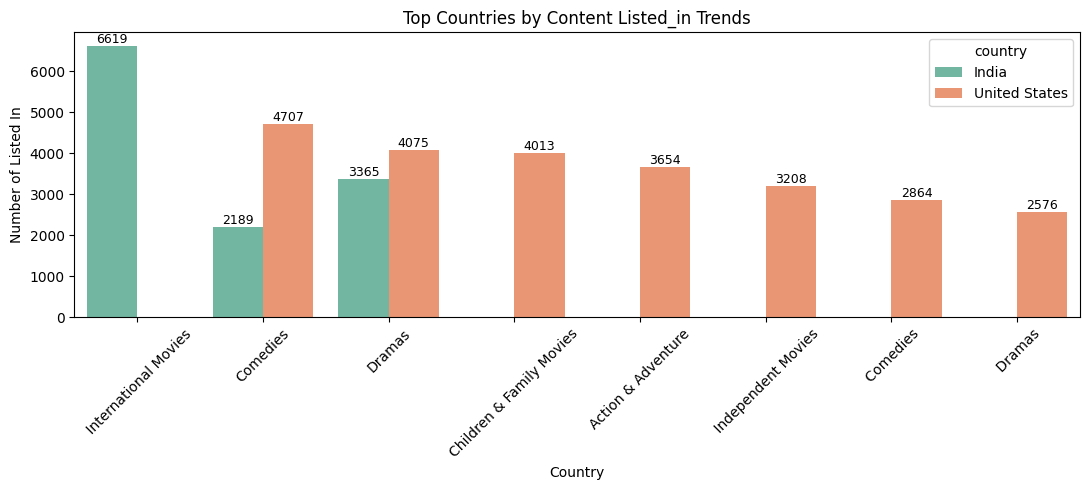

In [ ]:
plt.figure(figsize=(11, 5))
ax = sns.barplot(data=Genre_by_Country, x='listed_in', y='Total_Titles', hue='country', palette='Set2')

# Show value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,
                height + 1,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

plt.title('Top Countries by Content Listed_in Trends')
plt.xlabel('Country')
plt.ylabel('Number of Listed In')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **📚 Top Genres by Country on Netflix (Based on Total Titles)**
 - 🌍 India leads in International Movies with 6,619 titles, showing Netflix’s effort to distribute Indian content globally.

 - 😂 The United States dominates Comedies with 4,707 titles, indicating a strong preference for light-hearted content.

 - 🎭 Dramas are also popular in the U.S., with over 4,000 titles, reflecting deep storytelling content.

 - 👨‍👩‍👧‍👦 The U.S. also offers 4,013 titles under Children & Family Movies, showing its focus on family-friendly content.

- 🔫 Action & Adventure from the U.S. follows with 3,654 titles, appealing to thrill-seekers.

- 🇮🇳 India’s Dramas are also prominent with 3,365 titles, making it a key genre in Indian cinema on Netflix.

- 🎬 Independent Movies from the U.S. account for 3,208 titles, showing support for non-mainstream filmmaking.

- 😂 Comedy appears again for the U.S. with 2,864 titles, possibly overlapping across sub-categories.

- 🎭 More Dramas (2,576) are listed under a separate category for the U.S., pointing to genre tagging variations.

- 🇮🇳 India’s Comedies make the list too with 2,189 titles, reflecting a growing interest in humorous storytelling.

## **20) Are there content trends based on country and rating?**


In [ ]:
Unknown_country = df[df['country'] != 'Unknown_country']
Based_on_Country_Rating = Unknown_country.groupby(['country', 'rating'])['show_id'].count().reset_index(name='Total_Titles')
Based_on_Country_Rating = Based_on_Country_Rating.sort_values(by='Total_Titles', ascending=False).head(10)
Based_on_Country_Rating

,country,rating,Total_Titles
508,United States,Adults,23977
360,India,Young Adults,12143
510,United States,Older Kids,9739
511,United States,Teens,7679
356,India,Adults,6333
503,United Kingdom,Adults,6010
512,United States,Young Adults,5385
259,United States,Adults,4981
472,Spain,Adults,3791
358,India,Older Kids,3347


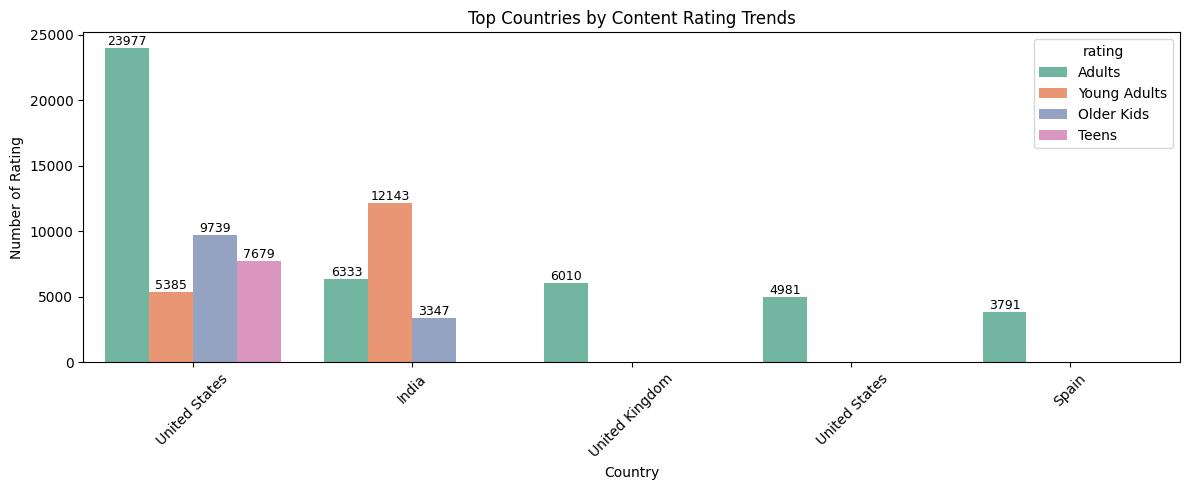

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Based_on_Country_Rating, x='country', y='Total_Titles', hue='rating', palette='Set2')

# Show value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,
                height + 1,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

plt.title('Top Countries by Content Rating Trends')
plt.xlabel('Country')
plt.ylabel('Number of Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **🔐 Top 10 Country-Rating Combinations on Netflix (Based on Total Titles)**
- 🇺🇸 United States – Adults: Leads with a massive 23,977 titles, highlighting a major focus on mature content.

- 🇮🇳 India – Young Adults: Comes next with 12,143 titles, showing Netflix’s strong appeal among Indian youth.

- 🧒 United States – Older Kids: Offers 9,739 titles, emphasizing Netflix's broad kids’ content library in the U.S.

- 🧑‍🎓 United States – Teens: Has 7,679 titles, reflecting a strategic push for teen-focused shows and movies.

- 🇮🇳 India – Adults: Lists 6,333 titles, indicating a balanced mix of content for mature Indian audiences.

- 🇬🇧 United Kingdom – Adults: Adds 6,010 titles, showcasing demand for adult-rated British entertainment.

- 🇺🇸 United States – Young Adults: With 5,385 titles, Netflix targets the U.S. college-age and early career viewers.

- 🇺🇸 United States – Adults (another entry): 4,981 titles might indicate overlaps or reclassification in ratings data.

- 🇪🇸 Spain – Adults: Joins the list with 3,791 titles, pointing to a strong adult audience in Spanish-speaking markets.

- 🇮🇳 India – Older Kids: Offers 3,347 titles, showing the popularity of youth and children’s content in India.



## **21) Which countries have the most new content added in recent years?**


In [ ]:
Unknown_country = df[df['country'] != 'Unknown_country']
Based_on_Country_year_added = Unknown_country.groupby(['country', 'year_added'])['show_id'].count().reset_index(name='Total_Titles')
Based_on_Country_year_added = Based_on_Country_year_added.sort_values(by='Total_Titles', ascending=False).head(10)
Based_on_Country_year_added

,country,year_added,Total_Titles
696,United States,2019,12905
697,United States,2020,11185
698,United States,2021,9734
479,India,2018,7316
695,United States,2018,6920
694,United States,2017,5279
480,India,2019,4439
481,India,2020,4270
478,India,2017,3228
343,United States,2020,2804


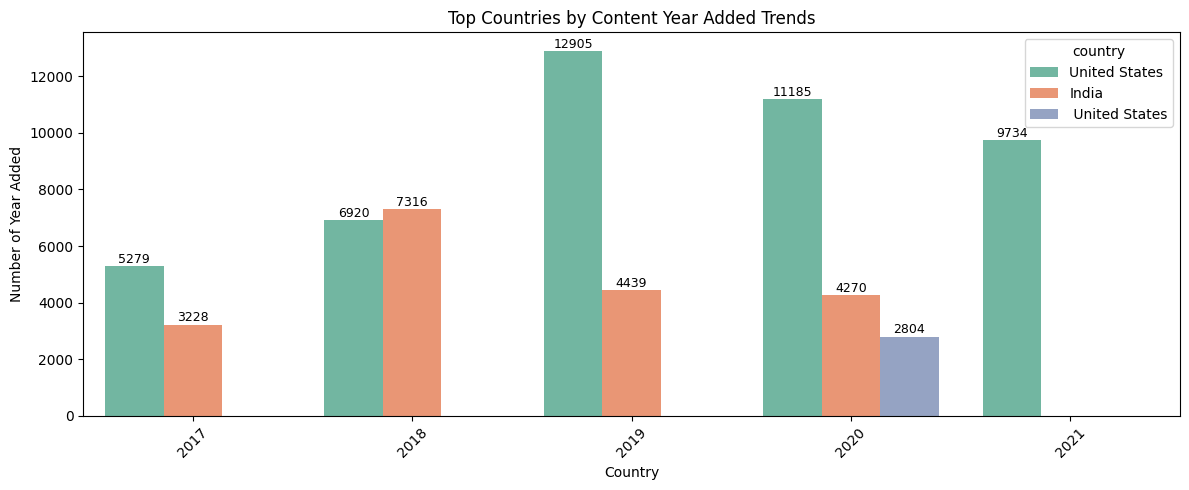

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Based_on_Country_year_added, x='year_added', y='Total_Titles', hue='country', palette='Set2')

# Show value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,
                height + 1,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

plt.title('Top Countries by Content Year Added Trends')
plt.xlabel('Country')
plt.ylabel('Number of Year Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **📅 Top 10 Netflix Title Additions by Country and Year**
- 🇺🇸 United States (2019): Added 12,905 titles — peak content expansion year.

- 🇺🇸 United States (2020): Added 11,185 titles — strong growth during pandemic.

- 🇺🇸 United States (2021): Added 9,734 titles — steady content rollout continues.

- 🇮🇳 India (2018): Added 7,316 titles — major boost in Indian content.

- 🇺🇸 United States (2018): Added 6,920 titles — early expansion phase.

- 🇺🇸 United States (2017): Added 5,279 titles — foundation building years.

- 🇮🇳 India (2019): Added 4,439 titles — continuing growth trend.

- 🇮🇳 India (2020): Added 4,270 titles — rising demand for regional content.

- 🇮🇳 India (2017): Added 3,228 titles — consistent content addition.

- 🇺🇸 United States (2020) (possible overlap): Added 2,804 titles — may be duplicate or subcategory.



# **🧠 Viewer Insights & Targeting**


## **22) What kind of content is targeted toward Adults, Kids, Teens, etc., based on rating and listed_in?**


In [ ]:
Audience_Genre = df.groupby(['rating', 'listed_in']).size().reset_index(name='Count')
Pivot_Table = Audience_Genre.pivot(index='listed_in', columns='rating', values='Count').fillna(0)

Pivot_Table['Total'] = Pivot_Table.sum(axis=1)

Pivot_Table = Pivot_Table.sort_values(by='Total', ascending=False)
Pivot_Table = Pivot_Table.head(10)
Pivot_Table

rating,Adults,Kids,Older Kids,Teens,Young Adults,Total
listed_in,,,,,,
International Movies,14276.0,286.0,2536.0,1283.0,8742.0,27123.0
Dramas,11728.0,98.0,1468.0,2097.0,4208.0,19599.0
Comedies,7410.0,62.0,1170.0,1814.0,3422.0,13878.0
Action & Adventure,6308.0,7.0,933.0,2854.0,2112.0,12214.0
Dramas,4614.0,222.0,1885.0,1181.0,2229.0,10131.0
Independent Movies,7157.0,24.0,489.0,506.0,1372.0,9548.0
Children & Family Movies,21.0,2663.0,6376.0,66.0,168.0,9294.0
TV Dramas,5228.0,99.0,378.0,0.0,2231.0,7936.0
International TV Shows,3983.0,39.0,471.0,0.0,2552.0,7045.0


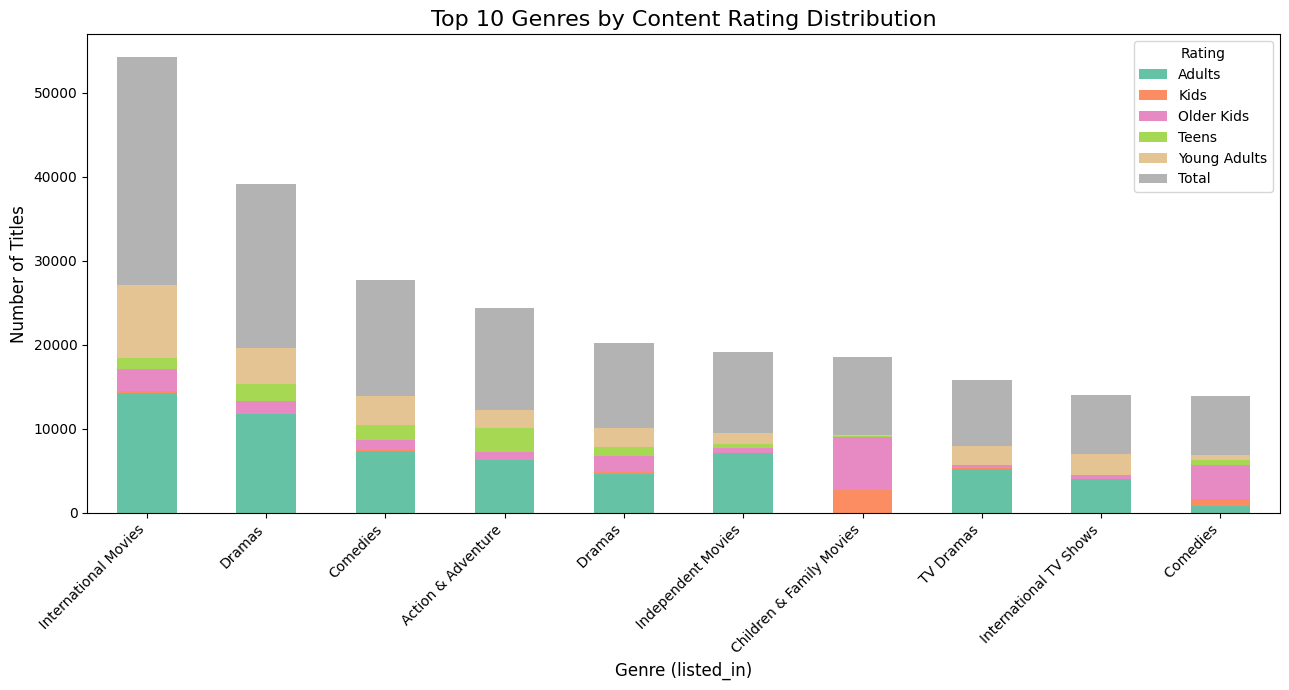

In [ ]:
Pivot_Table.plot(kind='bar', stacked=True, figsize=(13, 7), colormap='Set2')

plt.title('Top 10 Genres by Content Rating Distribution', fontsize=16)
plt.xlabel('Genre (listed_in)', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

## **🎯 Top 10 Genres by Audience Rating (Title Counts)**
### **🔎 Insights**
- International Movies dominate Netflix’s top genres, especially popular among Adults and Young Adults.

- Dramas are the second most common genre, with strong appeal across Adults, Young Adults, and Older Kids.

- Comedies and Action & Adventure genres have large followings, mostly from Adults and Teens.

- Children & Family Movies clearly target younger audiences like Older Kids and Kids.

- The presence of multiple Drama and Comedy entries suggests sub-genre or category overlaps.

- Independent Movies maintain a steady adult viewership, highlighting niche content popularity.

- TV-focused genres like TV Dramas and International TV Shows also rank high, showing diverse content consumption.

## **23) Are there any patterns in content targeted by region or country?**


In [ ]:
Unknown_country = df[df['country'] != 'Unknown_country']
Country_Audience = Unknown_country.groupby(['country', 'rating']).size().reset_index(name='Count')
Pivot_Country = Country_Audience.pivot(index='country', columns='rating', values='Count').fillna(0)
Pivot_Country['Total'] = Pivot_Country.sum(axis=1)
Pivot_Country = Pivot_Country.sort_values('Total', ascending=False)
Pivot_Country = Pivot_Country.head(10)
Pivot_Country

rating,Adults,Kids,Older Kids,Teens,Young Adults,Total
country,,,,,,
United States,23977.0,3087.0,9739.0,7679.0,5385.0,49867.0
India,6333.0,147.0,3347.0,121.0,12143.0,22091.0
United Kingdom,6010.0,453.0,1408.0,1094.0,768.0,9733.0
United States,4981.0,410.0,1763.0,1465.0,835.0,9454.0
Japan,2956.0,22.0,1665.0,90.0,2584.0,7317.0
South Korea,2103.0,111.0,448.0,0.0,2072.0,4734.0
Canada,2306.0,524.0,814.0,139.0,612.0,4395.0
Spain,3791.0,38.0,131.0,22.0,273.0,4255.0
France,3011.0,70.0,437.0,237.0,427.0,4182.0


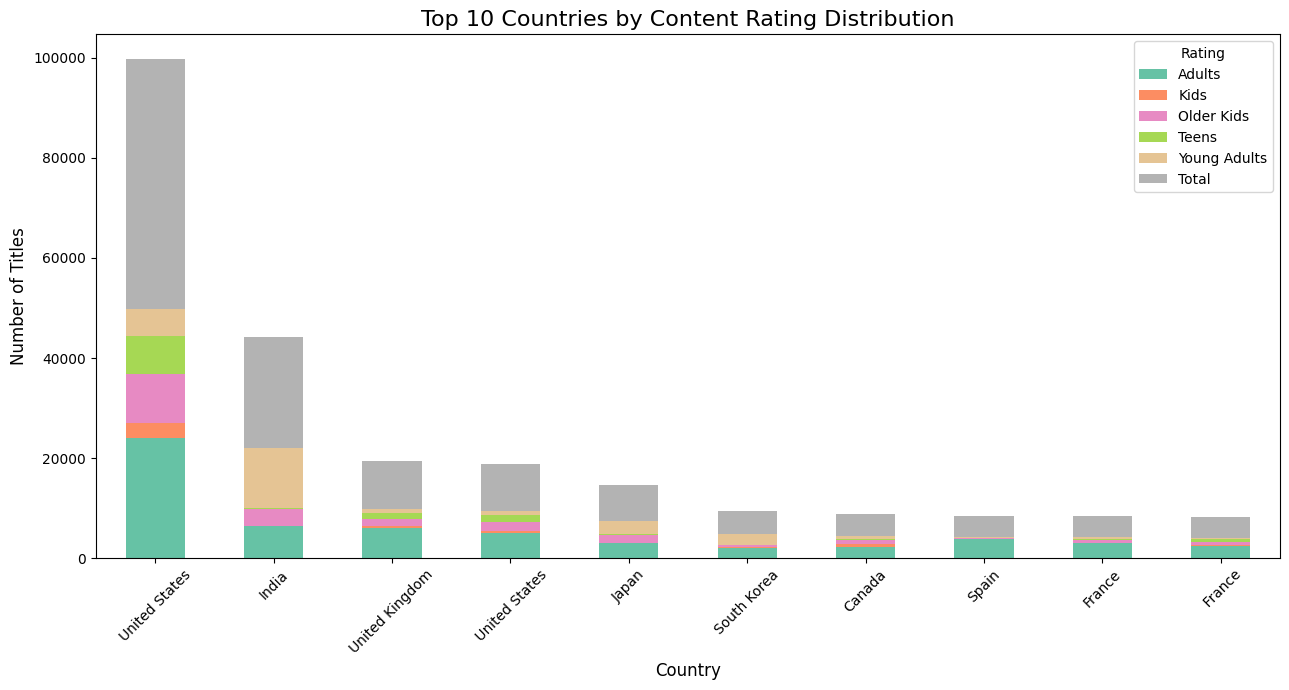

In [ ]:
Pivot_Country.plot(kind='bar', stacked=True, figsize=(13, 7), colormap='Set2')

plt.title('Top 10 Countries by Content Rating Distribution', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()

plt.show()

## **🎯 Top 10 Country-wise Audience Ratings:**
### **🔎 Insights**
- The United States dominates Netflix content both in volume and across all audience ratings, especially for Adults and Older Kids.

- India has a strong presence, with a majority of titles targeted at Young Adults, highlighting Netflix’s focus on youth content from India.

- The United Kingdom shows a balanced audience distribution, indicating diverse content catering to all age groups.

- The presence of two entries for the United States and France might suggest duplicates or different categorizations in the dataset.

- Japan and South Korea have significant content aimed at Young Adults and Adults, reflecting the global appeal of their dramas and shows.

- Countries like Canada, Spain, and France have moderate contributions, mainly targeting adult audiences but also some kids and teens content.



## **24) Which genres are most frequent for each age rating?**


In [ ]:
Genre_Counts = df.groupby(['rating', 'listed_in']).size().reset_index(name='Count')
Top_Genres_per_Rating = Genre_Counts.sort_values(['rating', 'Count'], ascending=[True, False])
Top_Genres_per_Rating = Top_Genres_per_Rating.drop_duplicates(subset='rating', keep='first')
print(Top_Genres_per_Rating)

           rating                 listed_in  Count
12         Adults      International Movies  14276
103          Kids  Children & Family Movies   2663
161    Older Kids  Children & Family Movies   6376
201         Teens        Action & Adventure   2854
225  Young Adults      International Movies   8742


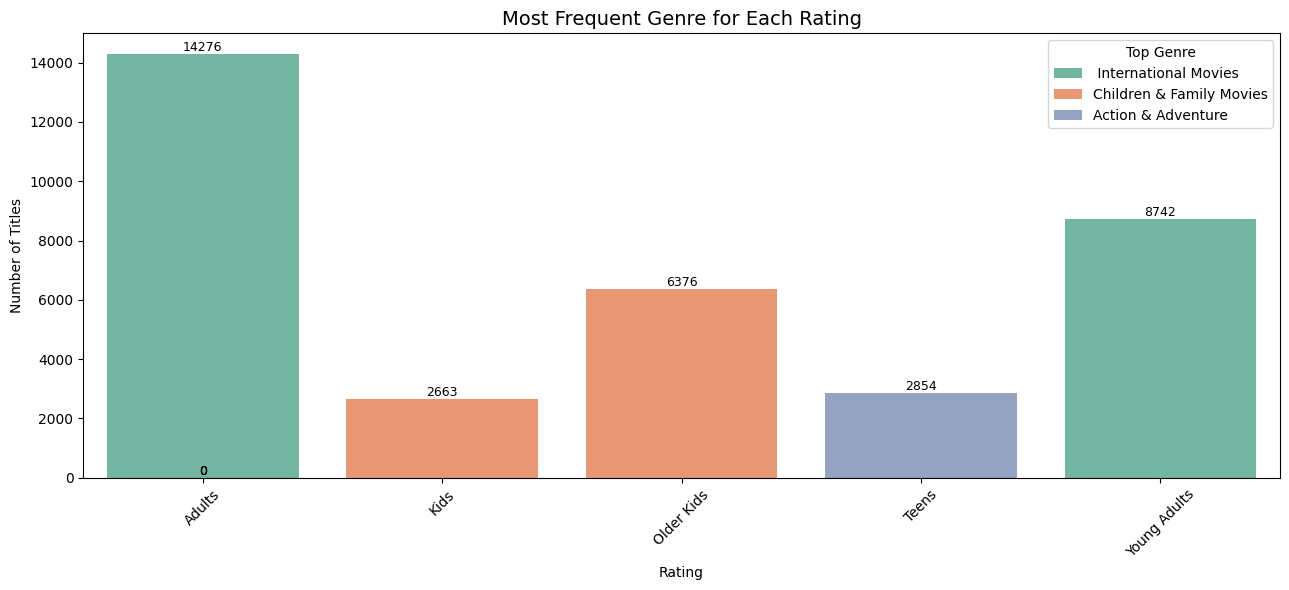

In [ ]:
plt.figure(figsize=(13, 6))
barplot = sns.barplot(data=Top_Genres_per_Rating, x='rating', y='Count', hue='listed_in', dodge=False, palette='Set2')

# Add labels on each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom', fontsize=9
    )
plt.title('Most Frequent Genre for Each Rating', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Top Genre', loc='upper right')
plt.tight_layout()
plt.show()

## **🎯 Top Genres by Audience Rating on Netflix**
### **🔍 Insights:**
- Children & Family Movies dominate content for both Kids and Older Kids, highlighting Netflix’s focus on family-friendly entertainment across these age groups.

- International Movies rank highest for Adults and Young Adults, pointing to a broad interest in multicultural and global cinema.

- The preference of Teens for Action & Adventure suggests Netflix’s success in capturing this demographic with high-energy, engaging genres.

- The gap between Kids and Older Kids in Children & Family Movies suggests content variety or complexity increases as children grow.

## **25) What is the distribution of content for different age groups (Kids, Teens, Adults)?**

In [ ]:
Audience_by_Rating = df['rating'].value_counts().reset_index()
Audience_by_Rating

,rating,count
0,Adults,101514
1,Young Adults,43869
2,Older Kids,32235
3,Teens,16246
4,Kids,7974


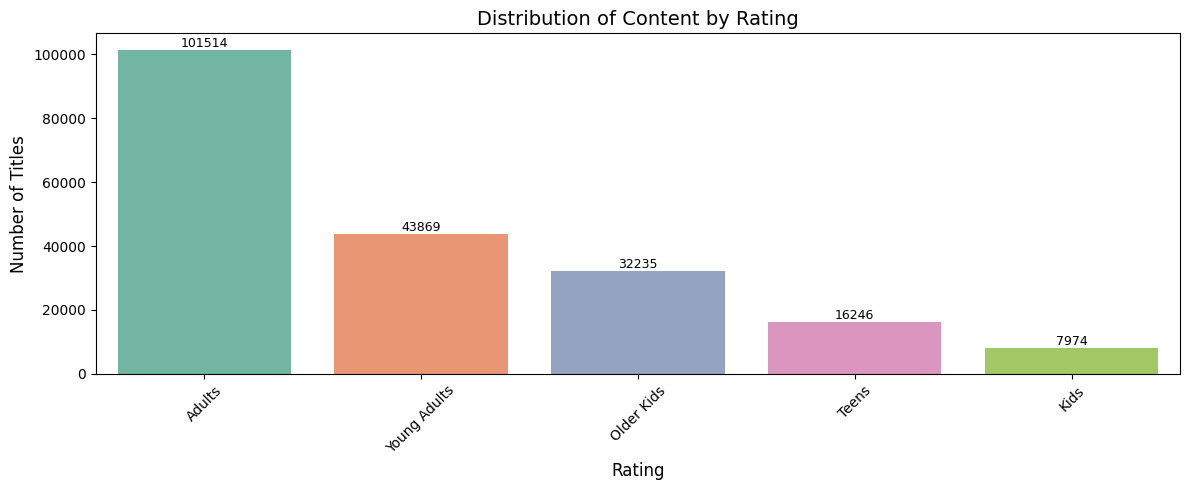

In [ ]:
Audience_by_Rating = df['rating'].value_counts().reset_index()
Audience_by_Rating.columns = ['rating', 'Count']

plt.figure(figsize=(12, 5))
barplot = sns.barplot(data=Audience_by_Rating, x='rating', y='Count', hue='rating', palette='Set2')

# Add value labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9)

plt.title('Distribution of Content by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **🎯 Netflix Content Distribution by Audience Rating**
### **🔍 Insights:**
- The Adults category dominates Netflix’s content library by a large margin, emphasizing mature and diverse programming.

- The content available decreases progressively as the target audience gets younger, indicating stricter content curation for kids and teens.

- The gap between Young Adults and Older Kids is notable, suggesting a significant jump in content complexity or variety aimed at young adults.

- The smallest content pool for Kids highlights Netflix’s focus on quality and safety over quantity for the youngest viewers.

# **📊 Advanced or Visual Questions:**


## **26) Heatmap of content addition by Year and Month.**


In [ ]:
Heatmap_Data = df.pivot_table(index = 'month_added', columns = 'year_added', values = 'show_id', aggfunc = 'count', fill_value = 0)
Heatmap_Data.reset_index()

year_added,month_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,April,0,0,0,0,0,0,21,37,469,1489,2395,3972,4204,4494
1,August,0,0,0,0,0,30,36,45,374,2562,3777,3075,2726,4461
2,December,0,0,0,0,42,90,146,459,1866,2484,3820,5606,3844,0
3,February,1,0,0,0,2,0,60,44,253,1847,1944,3147,3051,2705
4,January,54,0,0,0,0,0,91,1,889,1525,2878,3672,6139,3046
5,July,0,0,0,0,0,0,8,114,1367,1450,3644,3186,3389,7144
6,June,0,0,0,0,0,0,19,101,235,2141,1591,3723,4190,4659
7,March,0,0,0,0,0,30,0,50,291,2217,3733,4117,2860,2474
8,May,0,24,0,72,0,0,0,75,277,1956,1774,2687,3928,3034
9,November,0,6,21,0,16,10,49,36,652,1532,3319,6418,3562,0


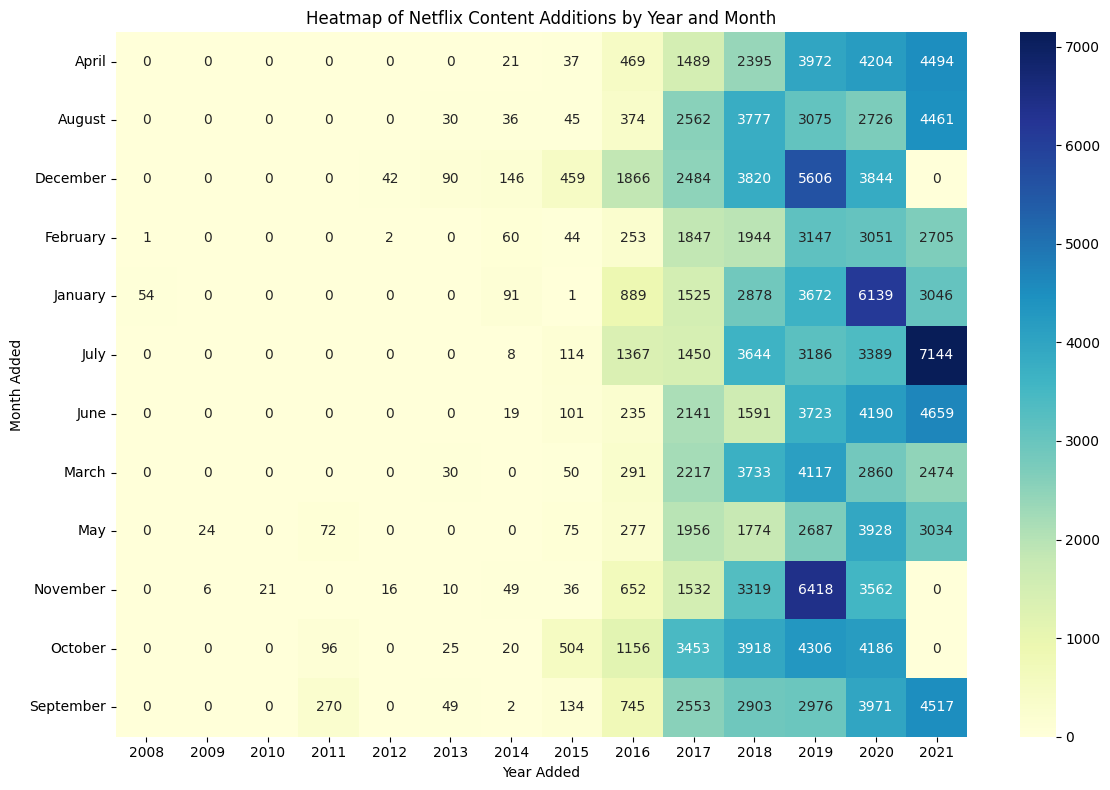

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(Heatmap_Data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Netflix Content Additions by Year and Month')
plt.xlabel('Year Added')
plt.ylabel('Month Added')
plt.tight_layout()
plt.show()

## **📈 Netflix Content Growth Trend Insights**
### **🐢 Slow Start (2008–2012):**
- Netflix ne apna streaming library dheere-dheere build kiya. Is dauran monthly content additions bahut kam ya zero rahe.

### **🚀 Shifting Phase (2013–2015):**
- 2013 se content additions mein dheere-dheere growth shuru hui. Har saal titles badhne lage, jaise April 2014 mein 21 titles se start.

### **📊 Strong Growth (2016–2019):**
- 2016 ke baad Netflix ne tezi se content add karna shuru kiya — har mahine thousands of titles.
- Example: April 2016: 469, July 2016: 1367, December 2019: 5606 titles.

### **🔥 Peak Expansion (2020–2021):**
- Pandemic ke time streaming demand badhne ki wajah se sabse zyada content add hua.
- Example: January 2020: 6139 titles, July 2021: 7144 titles — highest spike!

### **📅 Monthly Variation:**
- July, June, October, December consistently high months rahe, jabki April aur May thode slow rahe.

## **27) Pie chart or bar chart of content distribution by rating.**


In [ ]:
Rating_Counts = df['rating'].value_counts().reset_index()
Rating_Counts.columns = ['Rating', 'Count']
Rating_Counts

,Rating,Count
0,Adults,101514
1,Young Adults,43869
2,Older Kids,32235
3,Teens,16246
4,Kids,7974


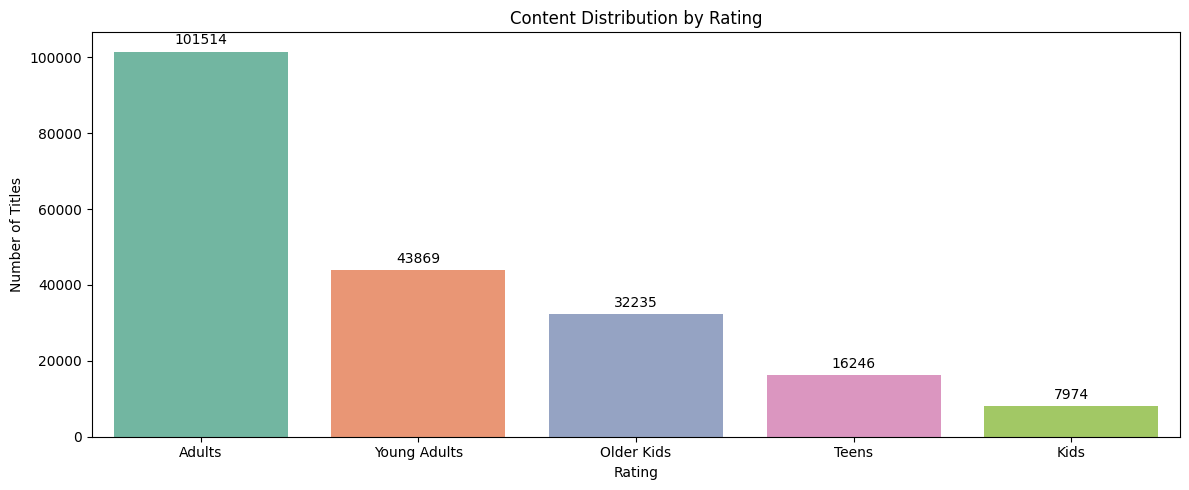

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=Rating_Counts, x='Rating', y='Count', hue='Rating', palette='Set2', dodge=False)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Content Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

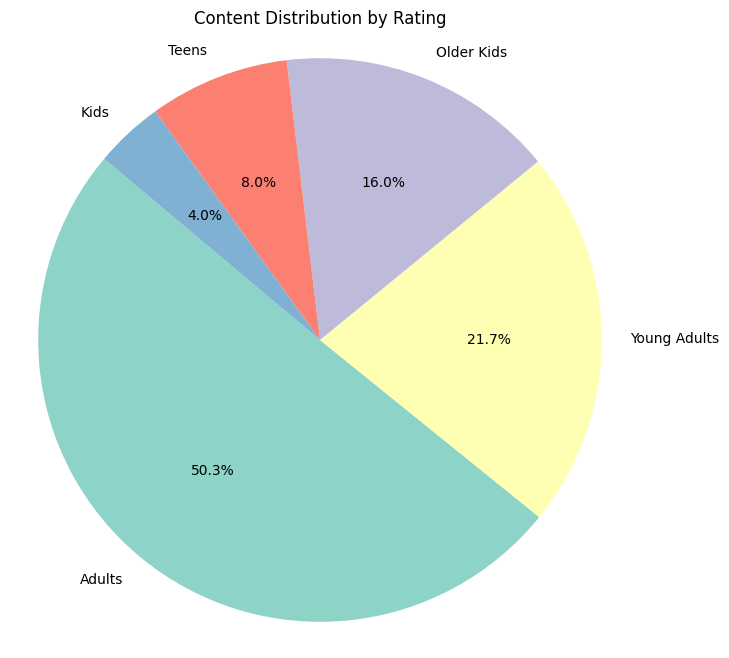

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(Rating_Counts['Count'], labels=Rating_Counts['Rating'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Content Distribution by Rating')
plt.axis('equal')
plt.show()

## **🎬 Netflix Content Ratings Insights**
### **🔞 Adults Content Dominates:**
- The majority of Netflix titles (101,514) are rated Adults, indicating a strong focus on mature and adult audiences.

### **👩‍🎤 Young Adults Are the Second Largest Group:**
- With 43,869 titles, Young Adults content is the second most prevalent category, catering to late teens and early 20s viewers.

### **🧒 Older Kids & Teens Content:**

- Older Kids category has 32,235 titles, showing a decent library for family-friendly, slightly mature kids’ content.

- Teens category has 16,246 titles, targeting teenage viewers specifically.

### **🧸 Kids Content is the Smallest:**
- Only 7,974 titles are aimed specifically at Kids, reflecting a smaller but - - important selection of safe and appropriate content for young children.

### **📊 Overall Audience Targeting:**
- Netflix's content is heavily skewed toward older audiences (Adults + Young - Adults = ~145,383 titles), but there is still significant content available for younger viewers, balancing family and adult entertainment.

## **28) Word cloud of most used keywords in listed_in.**


In [ ]:
text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2', collocations=False).generate(text)

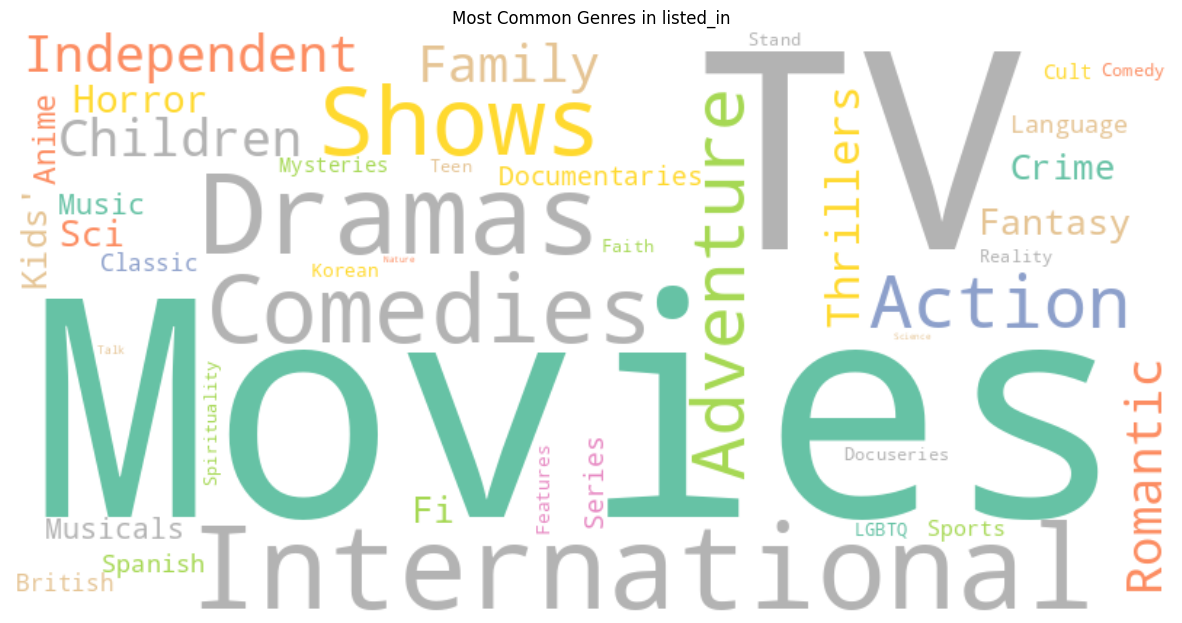

In [ ]:
# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres in listed_in')
plt.show()

## **A Genre Snapshot 🍿 Insights from the Word Cloud**

- **"Movies" and "TV" Dominate:** The largest words are "Movies" and "TV" 🎬📺, indicating these are the primary categories for content.

- **Strong Presence of Dramas, Comedies, and International Content:** "Dramas" 🎭, "Comedies" 😂, and "International" 🌍 are very prominent, suggesting these are highly common genres.

- **Diverse Range of Specific Genres:** Many other genres are visible, though smaller, such as "Independent" 🧘, "Horror" 👻, "Family" 👨‍👩‍👧‍👦, "Thrillers" 😨, "Action" 💥, "Romantic" ❤️, "Sci-Fi" 🚀, "Documentaries" 📜, "Children" 👧, and "Anime" 🎌. This shows a wide variety of content available.

- **Emerging or Niche Categories:** Smaller words like "Cult Comedy" 😂, "LGBTQ" 🌈, "Sports" 🏅, "Musicals" 🎶, "British" 🇬🇧, and "Korean" 🇰🇷 suggest more specific or niche categories that are still present.

- **Focus on Storytelling and Emotional Connection:** The prevalence of "Dramas," "Comedies," "Romantic," and "Action" suggests that content often revolves around engaging narratives and evoking emotions. 🥰

## **29) Top 5 directors by type of show (Movies vs TV Shows).**


In [ ]:
Unknown_Director = df[df['director'] != 'Unknown_director']
Top_5_Directors = Unknown_Director.groupby(['director', 'type']).size().reset_index(name='Count')

Top_5_Movie_Directors = Top_5_Directors[Top_5_Directors['type'] == 'Movie'].nlargest(5, 'Count').reset_index(drop=True)
Top_5_TV_Directors = Top_5_Directors[Top_5_Directors['type'] == 'TV Show'].nlargest(5, 'Count').reset_index(drop=True)

# Rename columns to distinguish
Top_5_Movie_Directors = Top_5_Movie_Directors.rename(columns={'director': 'Movie Director', 'Count': 'Movie Count'})
Top_5_TV_Directors = Top_5_TV_Directors.rename(columns={'director': 'TV Show Director', 'Count': 'TV Show Count'})

# Concatenate side by side
combined = pd.concat([Top_5_Movie_Directors[['Movie Director', 'Movie Count']], Top_5_TV_Directors[['TV Show Director', 'TV Show Count']]], axis=1)

print(combined)

        Movie Director  Movie Count  TV Show Director  TV Show Count
0      Martin Scorsese          419        Noam Murro            189
1      Youssef Chahine          409     Thomas Astruc            160
2  Cathy Garcia-Molina          356         Alan Poul            104
3     Steven Spielberg          355   Houda Benyamina            104
4       Lars von Trier          336   Laïla Marrakchi            104


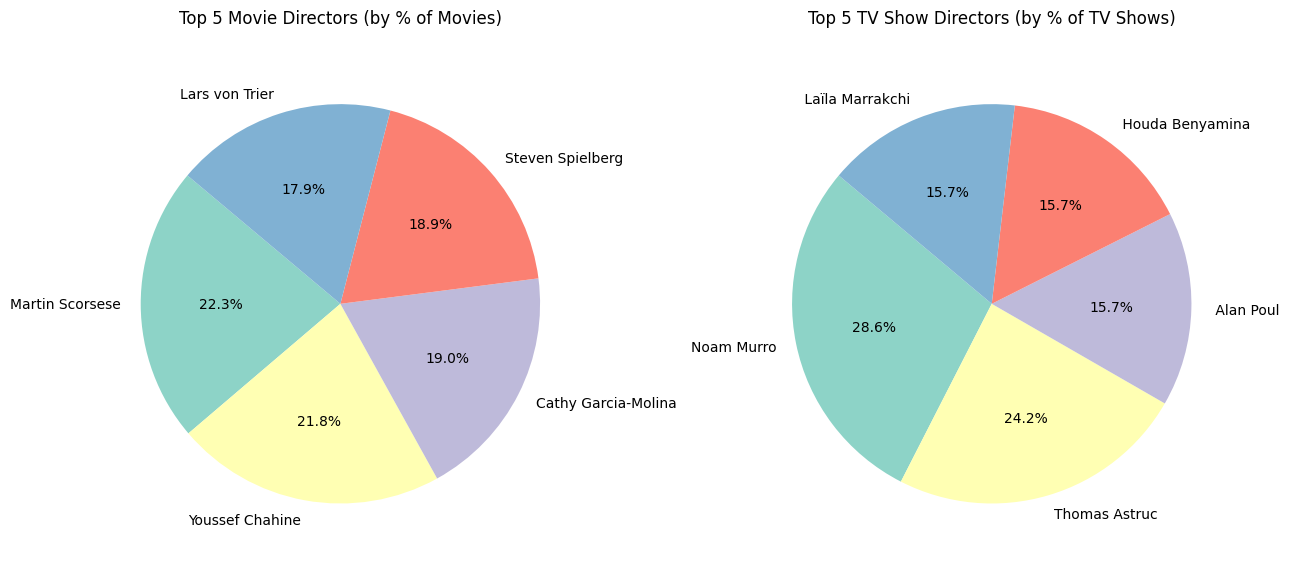

In [ ]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
plt.pie(Top_5_Movie_Directors['Movie Count'], labels=Top_5_Movie_Directors['Movie Director'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Movie Directors (by % of Movies)')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(Top_5_TV_Directors['TV Show Count'], labels=Top_5_TV_Directors['TV Show Director'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 TV Show Directors (by % of TV Shows)')
plt.axis('equal')

plt.tight_layout()
plt.show()

## **🎬 Top Movie Directors Insights:**
- Martin Scorsese leads with 419 movies on Netflix.

- Youssef Chahine (409), Cathy Garcia-Molina (356), Steven Spielberg (355), and Lars von Trier (336) are also top contributors.

- These directors dominate Netflix’s movie content, showing strong presence from acclaimed filmmakers.

## **📺 Top TV Show Directors Insights:**
- Noam Murro tops TV shows with 189 titles.

- Thomas Astruc (160), Alan Poul (104), Houda Benyamina (104), and Laïla Marrakchi (104) follow.

- TV show directors have fewer titles compared to movies but represent a diverse group, including notable female directors.

## **🔍 Overall:**
- Movie content is driven by a few prolific directors with hundreds of titles.

- TV shows have a broader range of directors with smaller counts but strong creative diversity.

## **30) Stacked bar chart of content per year split by type.**


In [ ]:
Content_by_Year_Type = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
Content_by_Year_Type = Content_by_Year_Type.loc[Content_by_Year_Type.sum(axis=1).sort_values(ascending=False).index]
Content_by_Year_Type.reset_index()

type,year_added,Movie,TV Show
0,2019,34377,12508
1,2020,32487,13563
2,2021,25709,10825
3,2018,27960,7736
4,2017,18252,6957
5,2016,4858,3716
6,2015,1125,475
7,2014,345,107
8,2011,438,0
9,2013,75,159


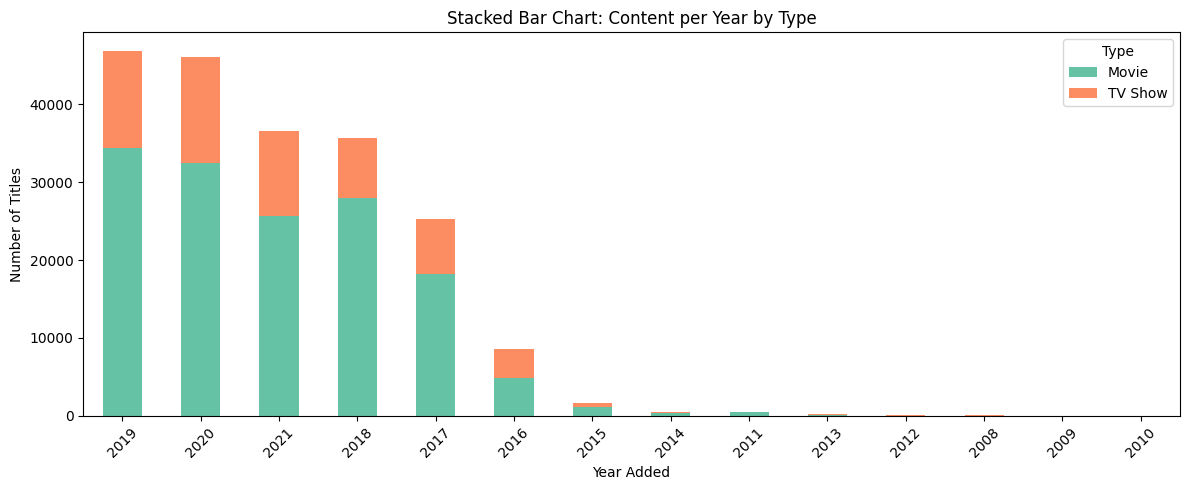

In [ ]:
Content_by_Year_Type.plot(kind='bar', stacked=True, figsize=(12, 5), color=plt.cm.Set2.colors)

plt.title('Stacked Bar Chart: Content per Year by Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## **📅 Content Additions by Year and Type Insights:**
**🔥 1. Peak Content Years:**

- 2019 leads with the highest total additions: 34,377 Movies and 12,508 TV Shows.

- 2020 follows closely with 32,487 Movies and 13,563 TV Shows, showing strong growth despite the pandemic.

- 2021 sees a slight drop but still high additions: 25,709 Movies and 10,825 TV Shows.

**📈 2. Growth Trend:**

- Content additions started very low before 2014 and grew exponentially from 2015 onward.

- The jump from 2015 (1,125 Movies, 475 TV Shows) to 2019 (over 34k Movies and 12k TV Shows) highlights Netflix’s rapid expansion.

**🎞️ 3. Movies vs TV Shows:**

- Movies consistently dominate content additions every year.

- TV Shows started to gain traction especially after 2013 but remain fewer than Movies in number.

**⬇️ 4. Early Years (2008-2013):**

- Very limited content added, reflecting the early stages of Netflix’s streaming service.

Some years like 2011 and 2013 show minor TV show additions, but overall numbers were small.